                                 
<table>
  <tr>
   <td colspan="2" >
    <h1><strong>The Marketability of Video Game Sales in 2024</strong></h1>
    A Statistical Modelling and Simulation (CSMODEL) Project.
   </td>
  </tr>
  <tr>
   <td>
  Group 4

  <strong>Ancheta, Liam Micheal Alain Barredo</strong>  
  <p>De La Salle University</p>
  <a href="mailto:liam_michael_ancheta@dlsu.edu.ph">liam_michael_ancheta@dlsu.edu.ph</a>  
  <br />       

  <strong>Campo, Roan Cedric Vinarao</strong>  
  <p>De La Salle University</p>
  <a href="mailto:roan_campo@dlsu.edu.ph">roan_campo@dlsu.edu.ph</a>  
  <br />  

  <strong>Domingo, Angela Sophia De Leon</strong>  
  <p>De La Salle University</p>
  <a href="mailto:angela_domingo@dlsu.edu.ph">angela_domingo@dlsu.edu.ph</a>
  <br />    

  <strong>Sanchez, Chloe Jeanine Esguerra</strong>  
  <p>De La Salle University<p>
  <a href="mailto:chloe_sanchez@dlsu.edu.ph">chloe_sanchez@dlsu.edu.ph</a>
  <br />

  </td>
  <td>
  <p><strong>Abstract</strong></p>

   <p>The Video Games Industry has been a highly profitable and lucrative industry as of recent years. With a product and industry as reliant on large funding for development as this one, it would be highly valuable to both developers and investors alike to know the several factors that affect Video Game Sales. This project, which utilizes the 2024 Kaggle Video Game Sales Dataset, aims to understand how certain aspects of a video game influence its total sales, including its genre, console, franchise, release date, and even box art. Data cleaning and pre-processing steps such as proper formatting, removing null values, and including franchises per game were performed on the original dataset before creating infographics and forming statistical tests. Several notable discoveries about these attributes were found. Certain genres appear more on specific consoles. While specific genres and specific consoles of a game can significantly influence the total sales, specific combinations of a game's genre and console does not significantly affect its sales. Video Games belonging to a larger franchise generally have much higher sales than standalone games. Lastly, while release month and year impact forecasting sales, it is also highly influenced by factors beyond the scope of the dataset.  
  </p>
  <p><strong>Keywords</strong></p>
  Video Game, Business, Data Analytics, ARIMA, Tukey's HSD
  </td>
  </tr>
</table>


# 1. Introduction

Video games are interactive activities that use a computational device, typically electronic, to allow users to gain pleasure, and many people engage in this pastime [1].


<table >
  <tr>
  <img src="https://static.wikia.nocookie.net/nintendo/images/5/5d/Super_Mario_Odyssey_%28NA%29_%28E3%29.jpg/revision/latest/scale-to-width-down/1000?cb=20170615163912&path-prefix=en" alt="drawing" width="150"/>
  </tr>
  <tr>
  <p><strong>Fig 1</strong>: Super Mario Odyssey<p>
  </tr>
</table>

There is a high demand in the interactive entertainment market, and many companies have produced titles with varying amounts of success. Moreover, the Interactive Entertainment Industry is one of the fastest-growing industries in the late 20th and early 21st Century. With the rise of such an industry, this research explores what factors influence the success of these products and their implications.

## 1.1. About the Dataset
This dataset was sourced from Kaggle Datasets and was authored by Asanickza and Brannen [2]. It served as a continuation of two previous datasets of a similar theme entitled 2019 Video Game Sales and 2020 Video Game Sales [3, 4]. The dataset contains general attributes of a video game, such as its publisher, developer, console, and sales across different regions and globally. The version of the dataset being used for analysis is the February 2025 version, which is the latest update at the time of this project.  The data set was web-scraped from Video Game Charts – a business intelligence and research firm that analyzes the video games market [2, 3].

## 1.2. Collection Process and its Implications

The date of the dataset implies the inclusion of most, if not all, of the games before 2024. This also implies that several consoles either outdated or not in use for modern games have also been included in the dataset. Any popular or high-selling games made in the first month of the year or beyond will not be included. The data acquired not only by this dataset but also by the datasets referenced by the current one was taken from a website called *VGChartz*, a video game sales information website dedicated to reporting game sales based on estimates from retail samples.
<table>
  <tr>
<img src="https://www.guinnessworldrecords.com/records/partners/organisations/images/vgchartz-organisations.jpg" width="200"/>
  </tr>
  <tr>
  <p><strong>Fig 2</strong>: VGChartz Logo, a video game information tracking service<p>
  </tr>
</table>

Given that the data taken from this site is based on estimates, and that the sources from which each data point is acquired have not been explicitly stated, the true sales data for each game is unknown. However, its creators claim that its data falls within the correct range [5]. As such, conclusions made from this data are subject to a degree of scrutiny or skepticism.


## 1.3. Structure of Dataset of the File
The dataset contains around 64K observations detailing the information, perceived critic score, and the sale metrics of each game and their released platform. Some games have repeat entries due to the platforms they were released on and the differing publishers and developers for the same franchise. All relevant data was already consolidated in one file, and some variables included in previous versions of the dataset were removed due to an excess amount of null data.

The dataset has 14 variables, and it has the following variables in no particular order:
  - (1) the total sales of the game
  - (2 - 5) regional sales of the game (Regions are North America, Japan, PAL Region, and Others),
  - (6) the platforms where the game was released,
  - (7) the box art,
  - (8) the title,
  - (9) the main genre it belongs to,
  - (10) the release date of the game,
  - (11) and the date since it was last updated.
  - (12 - 13) the developer and the publisher responsible for it,
  - (14) critic scores,
  

The variables related to sales were preprocessed relative to the millions, so the values are expected not to be completely raw. In addition to this, the sales included in the dataset have regional breakdowns; this consists of North American, PAL Regions (a type TV standard widely used in Europe and Africa), Japanese, and other unspecified region sales. The platforms where the games are released are explicitly separated from each other; metrics of the same game released on different platforms will have different results per platform.


# 2. Data Preprocessing

This section involves setting up some preprations for data cleaning. Please download the provided `box_art.csv` and `cleanfile.csv` in order to continue executing the following code cells of this project.

In [1264]:
import kagglehub
import cv2
import json
import os
import itertools
import pandas                                   as pd
import numpy                                    as np
import seaborn                                  as sns
import scipy.stats                              as sp
import matplotlib.colors                        as mcolors
import matplotlib.collections                   as mcollections
import matplotlib.pyplot                        as plt
import numpy.typing                             as npt
import datetime                                 as dt
import statsmodels.api                          as sm
import requests                                 as req
from dateutil.relativedelta                     import relativedelta
from PIL                                        import Image
from scipy.stats                                import chi2_contingency
from statsmodels.formula.api                    import ols
from statsmodels.tsa.stattools                  import adfuller
from statsmodels.tsa.arima.model                import ARIMA
from statsmodels.tsa.statespace.sarimax         import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [1265]:
# Constants

## Title Definitions for Graphs
title_dict = {
  'title'         : 'Title',
  'genre'         : 'Videogame Genre',
  'console'       : 'Console Platform',
  'release_date'  : 'Release Date',
  'last_update'   : 'Last Update',
  'total_sales'   : 'Total Global Sales',
  'na_sales'      : 'North American Sales',
  'jp_sales'      : 'Japanese Sales',
  'pal_sales'     : 'PAL Using Regions Sales',
  'other_sales'   : 'Other Regional Sales',
  'log_total_sales' : 'Log of Total Sales',
  'log_na_sales' : 'Log of North America Sales',
  'log_jp_sales' : 'Log of Japan Sales',
  'log_pal_sales' : 'Log of PAL Using Regions',
  'log_other_sales' : 'Log of Other sales',
}

# Plot Functions

def create_order(df, category_x, palette_hue="magma"):
  # Compute sorted order
  category_counts = df[category_x].value_counts()
  sorted_category = category_counts.index

  # Map counts for smooth hue transitions
  name = f'{category_x}_ranked'
  df[f'{category_x}_ranked'] = df[category_x].map(category_counts).fillna(0)

  # Use the exact number of colors needed
  num_categories = len(sorted_category)
  palette = sns.color_palette(palette_hue, n_colors=num_categories)

  return (sorted_category, name, num_categories, palette)



def plot_category_with_num(df, category_x, count_y):
  fig, ax = plt.subplots()

  sns.barplot(data=df, x=category_x, y=count_y, palette='hls')

  plt.title(f'{title_dict[count_y]} per {title_dict[category_x]}')
  plt.xlabel(f'{title_dict[category_x]}')

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

  plt.ylabel(f'{title_dict[count_y]}')

  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.grid(linestyle=':', alpha=0.5)
  plt.show()


def plot_count(df, category_x):
  fig, ax = plt.subplots(figsize=(16, 8))

  (sorted_category, hues, num_categories, palette)= create_order(df, category_x)
  # Plot countplot
  sns.countplot(
      data=df,
      x=category_x,
      order=sorted_category,
      hue=hues,
      palette=palette
  )

  plt.title(f'{title_dict.get(category_x, category_x)} Count')
  plt.xlabel(f'{title_dict.get(category_x, category_x)}')

  # Ensure correct tick labels
  ax.set_xticks(range(num_categories))
  ax.set_xticklabels(sorted_category, rotation=45, ha='right')

  plt.grid(linestyle=':', alpha=0.5)
  plt.show()

In [1266]:
# Import from kaggle and set as the database.
path_vgdf       = os.path.abspath(kagglehub.dataset_download("asaniczka/video-game-sales-2024"))
csv_vgdf        = os.path.join(path_vgdf, "vgchartz-2024.csv")
datetime_parse  = lambda x : dt.strptime(x, '%Y-%m-%d')

In [1267]:
# Define the database import
vgdf = pd.read_csv(
    csv_vgdf,
    parse_dates = ['release_date', 'last_update'], # Format the dates correctly
    date_format = datetime_parse
  )

## 2.2. Data Cleaning

Data Cleaning is the act of purging unnecessary and noisy data. Looking at the non-null count information given in the `info` function, there is some data needed to reformatted.

In [1268]:
vgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


To clean the data of the dataset, three actions were done:
1. Fill all null last_update values to their corresponding release_date values as the earliest last update date a game could have is its release date
2. Drop all null values found in the dataset as they cannot be inferred easily

In [1269]:
# Data Cleaning

## Convert release_date and last_update columns to have datetime datatype
vgdf['release_date' ]  = pd.to_datetime(vgdf['release_date'], errors='coerce')
vgdf['last_update'  ]  = pd.to_datetime(vgdf['last_update'], errors='coerce')

### Replace null last update to the release date.
vgdf.fillna({"last_update": vgdf["release_date"]}, inplace=True)

## Clarifying image column
vgdf = vgdf[~vgdf["img"].str.contains("default.jpg", na=False)]
vgdf['img_link'] = vgdf['img']
vgdf = vgdf.drop('img', axis=1)
vgdf = vgdf.astype({'img_link': 'string'})

## Type Setting
vgdf = vgdf.astype({
    'title': 'string',
    'publisher': 'string',
    'developer': 'string',
    'genre': 'string',
    'console': 'string'
})

## Logarithmic Sales
sales_col = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

for sale in sales_col:
  vgdf[f'log_{sale}'] = np.log10(vgdf[sale] + 1) # 0 sales means -inf, add 1 for safe keeping

## Reset index
vgdf.dropna(inplace=True)
vgdf.reset_index(drop=True, inplace=True)


In [1270]:
vgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            1209 non-null   string        
 1   console          1209 non-null   string        
 2   genre            1209 non-null   string        
 3   publisher        1209 non-null   string        
 4   developer        1209 non-null   string        
 5   critic_score     1209 non-null   float64       
 6   total_sales      1209 non-null   float64       
 7   na_sales         1209 non-null   float64       
 8   jp_sales         1209 non-null   float64       
 9   pal_sales        1209 non-null   float64       
 10  other_sales      1209 non-null   float64       
 11  release_date     1209 non-null   datetime64[ns]
 12  last_update      1209 non-null   datetime64[ns]
 13  img_link         1209 non-null   string        
 14  log_total_sales  1209 non-null   float64

## 2.3. Console Mapping


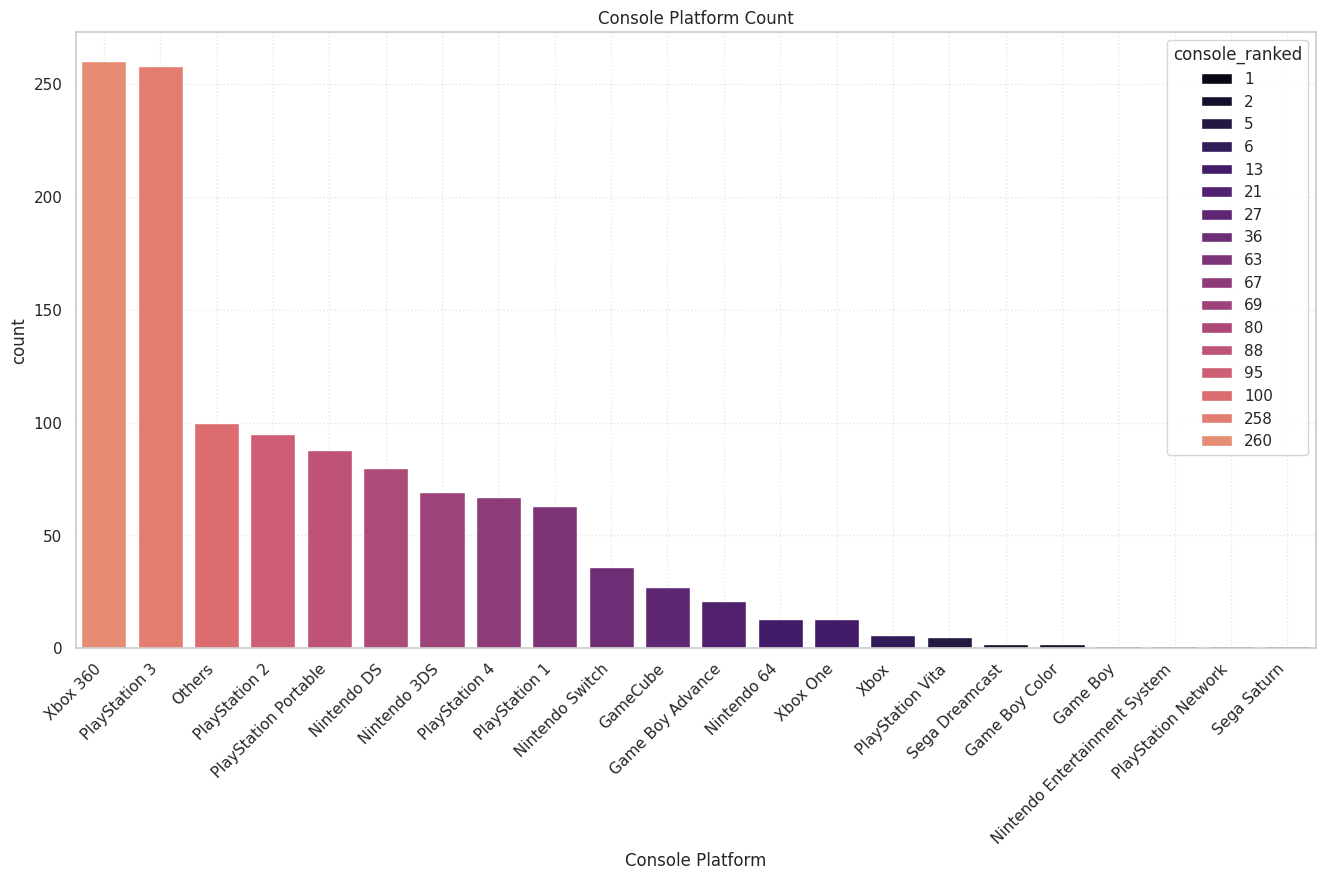

In [1271]:
## Console Map
consoles = {'X360' : 'Xbox 360', 'PS3' : 'PlayStation 3', 'PS2' : 'PlayStation 2', 'PSP' : 'PlayStation Portable', 'DS' : 'Nintendo DS',
            '3DS' : 'Nintendo 3DS', 'PS4' : 'PlayStation 4', 'PS' : 'PlayStation 1', 'NS' : 'Nintendo Switch', 'GC' : 'GameCube', 'GBA' : 'Game Boy Advance',
            'N64' : 'Nintendo 64', 'XOne' : 'Xbox One', 'XB' : 'Xbox', 'PSV' : 'PlayStation Vita', 'DC' : 'Sega Dreamcast', 'GBC' : 'Game Boy Color',
            'PSN' : 'PlayStation Network', 'NES' : 'Nintendo Entertainment System', 'GB' : 'Game Boy', 'SAT' : 'Sega Saturn'}

## Renames the consoles to their full/legible name
vgdf['console'] = vgdf['console'].map(lambda x: consoles.get(x, 'Others'))

plot_count(vgdf.sort_values(by="console"), 'console')

In [1272]:
IMAGE_DATABASE = 'box_art.csv'
TEMP_FOLDER = 'temp'

HIST_COLUMNS = [
  'hist_hue'
  , 'hist_val'
  , 'hist_sat'
]

COLOR_COLUMNS = [
  'clr_warm'
  , 'clr_green'
  , 'clr_cool'
  , 'clr_purple'
  , 'clr_black'
  , 'clr_white'
  , 'clr_grays'
  , 'clr_very_sat'
]

IMAGE_COLUMNS = list(itertools.chain.from_iterable([['img_link'], HIST_COLUMNS, COLOR_COLUMNS]))

URL_ROOT = "https://www.vgchartz.com"
URL_GAME_BOXART = '/games/boxart/'
PREF_IMG_SIZE = (256, 256)
GEN_BSIZE = 64
HUE_BSIZE = 12

SAT_MASK = 25 #
VAL_MASK = 25 #
HUE_CLASSIFICATION_THRESHOLD = (0.2) # 1/4 = 0.25, lowered to 0.20 to account the possibility of balanced all hues
VAL_CLASSIFICATION_THRESHOLD = (0.33) # 1/3 = 0.33, lowered to 0.30 to account the possibility of balanced black, gray, and white

BIN_WIDTH   = 256 / GEN_BSIZE  # Bin width for 12-bin histogram
BINS_LOWSAT = int(SAT_MASK / BIN_WIDTH)  # Bins to consider for low saturation
BINS_WHITES = int(VAL_MASK / BIN_WIDTH)  # Bins to consider for low value (black potential)
BINS_BLACKS = int(VAL_MASK / BIN_WIDTH)  # Bins to consider for high value (white potential)

hue_categories = {
  IMAGE_COLUMNS[4] : [0,  1,  2],
  IMAGE_COLUMNS[5] : [3,  4,  5],
  IMAGE_COLUMNS[6] : [6,  7,  8],
  IMAGE_COLUMNS[7] : [9, 10, 11]
}

classification_cols = {
      "clr_warm"      : "Warm",
      "clr_green"     : "Greens",
      "clr_cool"      : "Cool",
      "clr_purple"    : "Purples",
      "clr_black"     : "Dark",
      "clr_white"     : "Light",
      "clr_grays"     : "Desat Grays",
      "clr_very_sat"  : "Vivid",
}

In [1273]:
def image_db_check() -> pd.DataFrame:
  """Checks if the required `temp` directory and image database is located.

  Returns:
      pd.DataFrame: The located or newly created DataFrame file.
  """
  if os.path.isfile(IMAGE_DATABASE):
    print("[ O K ] Image Database located")
    boxart_df = pd.read_csv(IMAGE_DATABASE)
    boxart_df = boxart_df.drop(columns=["Unnamed: 0"], errors="ignore")
  else:
    print("[ERROR] No Image database found, creating....")
    boxart_df = pd.DataFrame(columns=IMAGE_COLUMNS)
    boxart_df.to_csv(IMAGE_DATABASE)
    os.makedirs(TEMP_FOLDER)

  if os.path.isdir(TEMP_FOLDER):
    print("[ O K ] Temporary Folder located")
    return boxart_df
  else:
    print("[ERROR] Please create a `temp` folder in the same directory of execution (aka root of your repo).")
    exit(-1)

def calcHist(image: cv2.typing.MatLike, channel: int, mask: npt.NDArray[np.uint8], binsize: int, ranges: list[int]) -> cv2.typing.MatLike:
  return cv2.calcHist([image], [channel], mask, [binsize], ranges)

def normImage(image: cv2.typing.MatLike) -> npt.NDArray:
  return cv2.normalize(image, image, norm_type=cv2.NORM_L1).flatten()

percentage = lambda ratio : True if ratio > VAL_CLASSIFICATION_THRESHOLD else False
percentage_all = lambda ratio1, ratio2, ratio3: True if (ratio1 <= VAL_CLASSIFICATION_THRESHOLD and ratio2 <= VAL_CLASSIFICATION_THRESHOLD and ratio3 <= VAL_CLASSIFICATION_THRESHOLD) else False

boxart_df = image_db_check()


[ O K ] Image Database located
[ O K ] Temporary Folder located


This below is the code to the image classifier.

In [1274]:
def image_classifier(partial_img_url: str):
  """Classifies images based on the give URL Link

  Args:
      partial_img_url (str): Partial link with the structure of '/games/boxart/`filename`', and it must be from https://www.vgchartz.com.

  Returns:
      None
  """
  global boxart_df
  # [2] Check NULLs for each row information
    # All Ok  -> Merge.
    # Err     -> Preprocessing.

  if boxart_df is not None and not boxart_df.empty:
    # Check if partial_img_url in vgdf contained in boxart_df
    b_inques = boxart_df.loc[boxart_df['img_link'].str.contains(str(partial_img_url), na=False)]
    if b_inques.isnull().sum().sum() == 0:
      print(f'[ O K ] - {partial_img_url} complete...')
      return b_inques;
    else:
      print(f'[ERROR] - Missing {partial_img_url}, analyzing...')
  else:
    print(f'[ERROR] - MissingDB, Missing {partial_img_url}, analyzing...')


  #### WEBSCRAPING ####
  res = req.get(URL_ROOT + partial_img_url)

  if res.status_code != 200:
    print(f"[ERROR - |WEB - Status Code: {res.status_code}")
    exit(-1);

  file_name = partial_img_url.replace(URL_GAME_BOXART, '')
  img_jpg = os.path.join(TEMP_FOLDER, file_name)
  img_png = img_jpg.replace('.jpg', '.png')

  try:
    with open(img_jpg, 'wb') as img_file:
      img_file.write(res.content)
  except:
    print("Error, create a folder named `temp`")
    exit(-3)

  with Image.open(img_jpg) as im:
    im.save(img_png, "PNG")


  #### NORMALIZATION ####

  image = cv2.imread(img_png, cv2.IMREAD_COLOR)
  image = cv2.resize(image, PREF_IMG_SIZE)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  grays_mask = (image[:, :, 1] > SAT_MASK)
  black_mask = (image[:, :, 2] > VAL_MASK)
  white_mask = (image[:, :, 2] < (255 - VAL_MASK))
  mask = grays_mask & black_mask & white_mask

  #### HISTOGRAM EXTRACTION ####

  hist_hue = normImage(calcHist(image, 0, mask.astype(np.uint8), HUE_BSIZE, [0, 180]))
  hist_hue = hist_hue / np.sum(hist_hue)
  hist_sat = normImage(calcHist(image, 1, None                 , GEN_BSIZE, [0, 256]))
  hist_sat = hist_sat / np.sum(hist_sat)
  hist_val = normImage(calcHist(image, 2, None                 , GEN_BSIZE, [0, 256]))
  hist_val = hist_val / np.sum(hist_val)

  #### PALETTE CLASSIFICATION ####

  hue_classes = {hue_key: False for hue_key in hue_categories.keys()}

  for (hue_group, bin_number) in hue_categories.items():

    if np.sum(hist_hue[bin_number]) > HUE_CLASSIFICATION_THRESHOLD:
      hue_classes[hue_group] = True

  ratio_lowsat  = np.sum(hist_sat[:BINS_LOWSAT])    # Low saturation (grayscale potential)
  ratio_black   = np.sum(hist_val[:BINS_WHITES])    # Low value (black potential)
  ratio_white   = np.sum(hist_val[-BINS_BLACKS:])   # High value (white potential)

  grayscale_classification = {
    "clr_black"     : percentage(ratio_black),
    "clr_white"     : percentage(ratio_white),
    "clr_grays"     : percentage(ratio_lowsat),
    "clr_very_sat"  : percentage_all(ratio_black, ratio_white, ratio_lowsat)
  }

  try:
    os.remove(img_jpg)
    os.remove(img_png)
  except:
    pass

  image_features = {
    "img_link": partial_img_url,
    "hist_hue": json.dumps(hist_hue.tolist()),
    "hist_sat": json.dumps(hist_sat.tolist()),
    "hist_val": json.dumps(hist_val.tolist()),
    **hue_classes,
    **grayscale_classification
  }

  return image_features

Below is the code to handle the image classification.

In [1275]:
#### MERGING ####

def load_arrays(x):
  """
  Loads if a string, else its a
  """
  if isinstance(x, str):  # Ensure it's a string before parsing JSON
      return np.array(json.loads(x))
  elif isinstance(x, list):  # Already a list
      return np.array(x)
  return np.array([])  # Return empty array if something is wrong

each_test = vgdf.head(vgdf.shape[0]).iterrows()
print(each_test)

def isLinkValid(boxart_df, partial_img_url)-> bool:
  return (boxart_df is not None
        and not boxart_df.empty
        and isinstance(partial_img_url, str)
        and (boxart_df['img_link'].str.contains(partial_img_url)).any())

def process_all_images():
  """
  Processes all images in `vgdf` and updates `boxart_df` accordingly.
  - Skips already processed images.
  - Analyzes missing entries and appends them to `boxart_df`.
  """
  global boxart_df
  global vgdf

  # Store new observations before batch update
  new_entries = []
  rows = vgdf.shape[0]

  for idx, row in vgdf.iterrows():
    print(f"{idx} out of {rows}, {round(idx/rows * 100, 2)}%")
    partial_img_url = row['img_link']

    # Ensure img_link is valid and check if the image is already processed
    if (isLinkValid(boxart_df, partial_img_url)):
      row_obs = boxart_df.loc[boxart_df['img_link'].str.contains(partial_img_url)]
      if not row_obs.isnull().values.any():
        continue
    # Call the classifier to extract features
    new_entry = image_classifier(partial_img_url)

    # Handle NumPy arrays (ensure 2D shape)
    if isinstance(new_entry, np.ndarray):
        new_entry = new_entry.squeeze()  # Remove extra dimensions
        if new_entry.ndim == 1:
            new_entry = new_entry.reshape(1, -1)  # Ensure 2D for DataFrame

        new_entry = pd.DataFrame(new_entry)  # Convert to DataFrame

    # Handle dictionary (convert single row to DataFrame)
    elif isinstance(new_entry, dict):
        new_entry = pd.DataFrame([new_entry])

    # Ensure new_entry is valid before appending
    if isinstance(new_entry, pd.DataFrame) and not new_entry.empty:
        new_entries.append(new_entry)
  os.system('cls' if os.name == 'nt' else 'clear')
  # Only merge if new entries exist
  if new_entries:
      new_df = pd.concat(new_entries, ignore_index=True)  # Merge new entries
      boxart_df = pd.concat([boxart_df, new_df], ignore_index=True)  # Merge with database
      boxart_df.to_csv(IMAGE_DATABASE, index=False)
      print(f"[ O K ] - Processed {len(new_entries)} new images. Database updated.")
  else:
      print("[NOTES] - No new images needed processing.")

<generator object DataFrame.iterrows at 0x7f12e6032570>


This section executes the Image Classification. To ignore the process to save time, please download the provided file name `box_art.csv`.

In [1276]:
boxart_df = image_db_check()

[ O K ] Image Database located
[ O K ] Temporary Folder located


In [1277]:
process_all_images()

0 out of 1209, 0.0%
1 out of 1209, 0.08%
2 out of 1209, 0.17%
3 out of 1209, 0.25%
4 out of 1209, 0.33%
5 out of 1209, 0.41%
6 out of 1209, 0.5%
7 out of 1209, 0.58%
8 out of 1209, 0.66%
9 out of 1209, 0.74%
10 out of 1209, 0.83%
11 out of 1209, 0.91%
12 out of 1209, 0.99%
13 out of 1209, 1.08%
14 out of 1209, 1.16%
15 out of 1209, 1.24%
16 out of 1209, 1.32%
17 out of 1209, 1.41%
18 out of 1209, 1.49%
19 out of 1209, 1.57%
20 out of 1209, 1.65%
21 out of 1209, 1.74%
22 out of 1209, 1.82%
23 out of 1209, 1.9%
24 out of 1209, 1.99%
25 out of 1209, 2.07%
26 out of 1209, 2.15%
27 out of 1209, 2.23%
28 out of 1209, 2.32%
29 out of 1209, 2.4%
30 out of 1209, 2.48%
31 out of 1209, 2.56%
32 out of 1209, 2.65%
33 out of 1209, 2.73%
34 out of 1209, 2.81%
35 out of 1209, 2.89%
36 out of 1209, 2.98%
37 out of 1209, 3.06%
38 out of 1209, 3.14%
39 out of 1209, 3.23%
40 out of 1209, 3.31%
41 out of 1209, 3.39%
42 out of 1209, 3.47%
43 out of 1209, 3.56%
44 out of 1209, 3.64%
45 out of 1209, 3.72%
46

In [1278]:
vgdf = vgdf.merge(boxart_df, on='img_link', how='left')

for hist_channel in HIST_COLUMNS:
  vgdf[hist_channel] = vgdf[hist_channel].apply(load_arrays)

for color_channel in COLOR_COLUMNS:
  vgdf[color_channel] = vgdf[color_channel].fillna(False).astype(bool)

vgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            1209 non-null   string        
 1   console          1209 non-null   object        
 2   genre            1209 non-null   string        
 3   publisher        1209 non-null   string        
 4   developer        1209 non-null   string        
 5   critic_score     1209 non-null   float64       
 6   total_sales      1209 non-null   float64       
 7   na_sales         1209 non-null   float64       
 8   jp_sales         1209 non-null   float64       
 9   pal_sales        1209 non-null   float64       
 10  other_sales      1209 non-null   float64       
 11  release_date     1209 non-null   datetime64[ns]
 12  last_update      1209 non-null   datetime64[ns]
 13  img_link         1209 non-null   object        
 14  log_total_sales  1209 non-null   float64

# 3. Exploratory Data Analysis

In the section, we explore the relationships of variables of the dataset with other variables.

## 3.1. Genre

Genre is a classification of a video game’s characteristics. Different genres cater to different audiences, knowing the nature of genre will help developers determine the video game’s likelihood to sell well.  

### General Insights and EDA Questions for Genre
Here are some general insights of the genre column and some EDA questions.


**1. What is the highest total sold Genre?**

Here, we are exploring the global sales of the number of copies sold by a video game genre.

The Shooter genre has the most copies sold, followed by the Action genre, and then Sports genre.

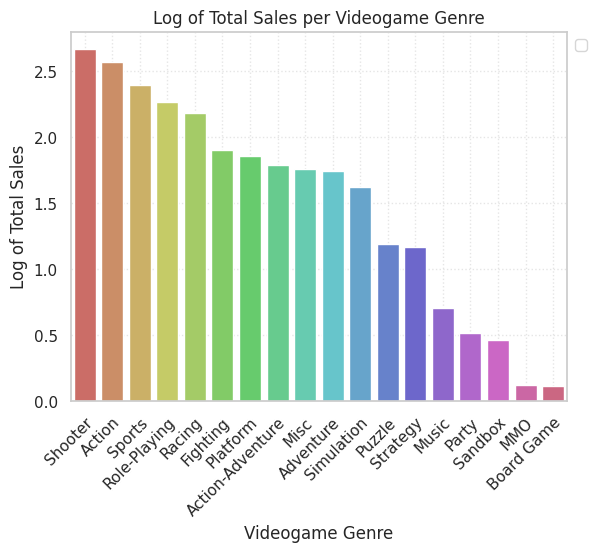

In [1279]:
# The most profitable genre:

genre_sales = (vgdf.groupby("genre", observed=True)["total_sales"]
  .sum()
  .reset_index()
  .sort_values(by='total_sales', ascending=False)
  .reset_index(drop=True))

genre_sales['log_total_sales'] = np.log10(genre_sales['total_sales'] + 1)


plot_category_with_num(genre_sales, 'genre', 'log_total_sales')


Here, we explore the explore what is the most sold title under each genre.

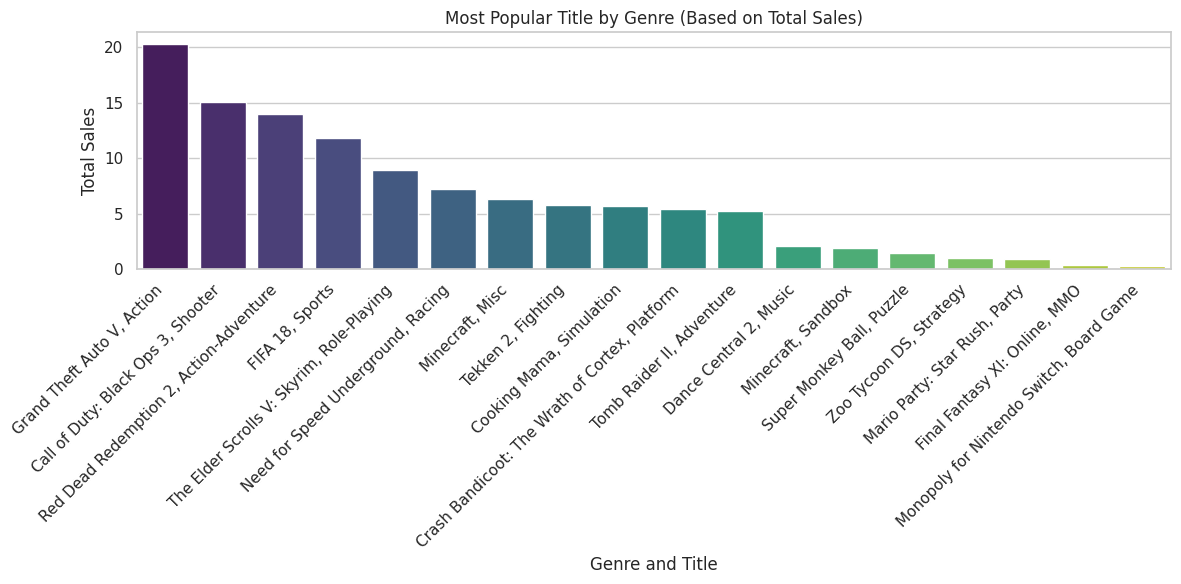

In [1280]:
# The Top Best Unique Videogames per Genre Category
idx_pop_title_under_genre = vgdf.groupby(by=['genre'], observed=True)['total_sales'].idxmax()
top_best=vgdf.loc[idx_pop_title_under_genre][['genre', 'title', 'total_sales']].sort_values(by='total_sales', ascending=False).reset_index()
top_best['genre'] = top_best['genre'].astype('str')

# Combine genre and title into a single column
top_best['genre_title'] = top_best['title'] + ', ' + top_best['genre']

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_title', y='total_sales', data=top_best, palette='viridis')

# Adding labels and title
plt.title('Most Popular Title by Genre (Based on Total Sales)')
plt.xlabel('Genre and Title')
plt.ylabel('Total Sales')

# Rotate the x-axis labels for better readability

plt.xticks(ticks=range(len(top_best)), labels=top_best['genre_title'], rotation=45, ha='right')


# Show the plot
plt.tight_layout()
plt.show()


#### Summary Statistics

**2. What game genre is most likely to sell well overall?**

Video game companies may want to investigate what video game genre to pursue making that has the highest likelihood to sell to its customers. This result is found by plotting the total global sales on a box plot and comparing medians.

Results show that Sports Games have a higher likelihood to sell well compared to its peers. It has a higher median, higher upper quartile and longer upper whisker. In contrast, the lowest likelihood for a genre to sell well are Board Game Games, for it has the lowest median out of the rest of the other genres.

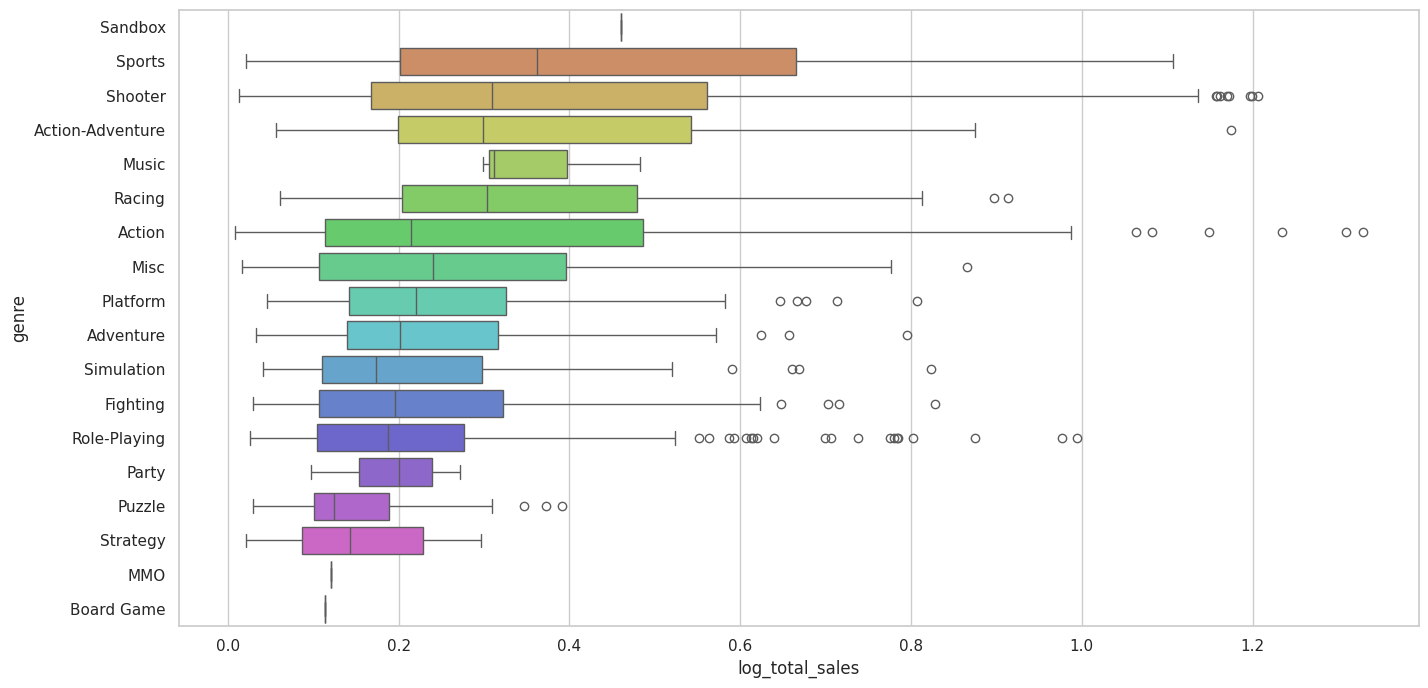

In [1281]:
genre_order = vgdf.groupby('genre')['log_total_sales'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(vgdf, x='log_total_sales', y='genre', order=genre_order, palette='hls')
plt.show()

### Regional Analysis
**3. Do the genre of video games sell better differ in the different regions?**

There are multiple regions of the world that have different interests, different accepted ideas, and different outlook. These may influence the purchasing power of a customer towards the genre of a preferred video game title. Thus, it may be worth investigating this portion of MCO. Each genre's success is measured to the number of units sold in each region. The regions included are: North America, Japan, Africa and Europe, and Other Regions (South America, Oceania, and Rest of Asia).

One notable example is that there is a region that is different from the rest - Japan, for Role Playing Games (RPGs) is the top genre sold here rather than Shooter Games like in other regions.

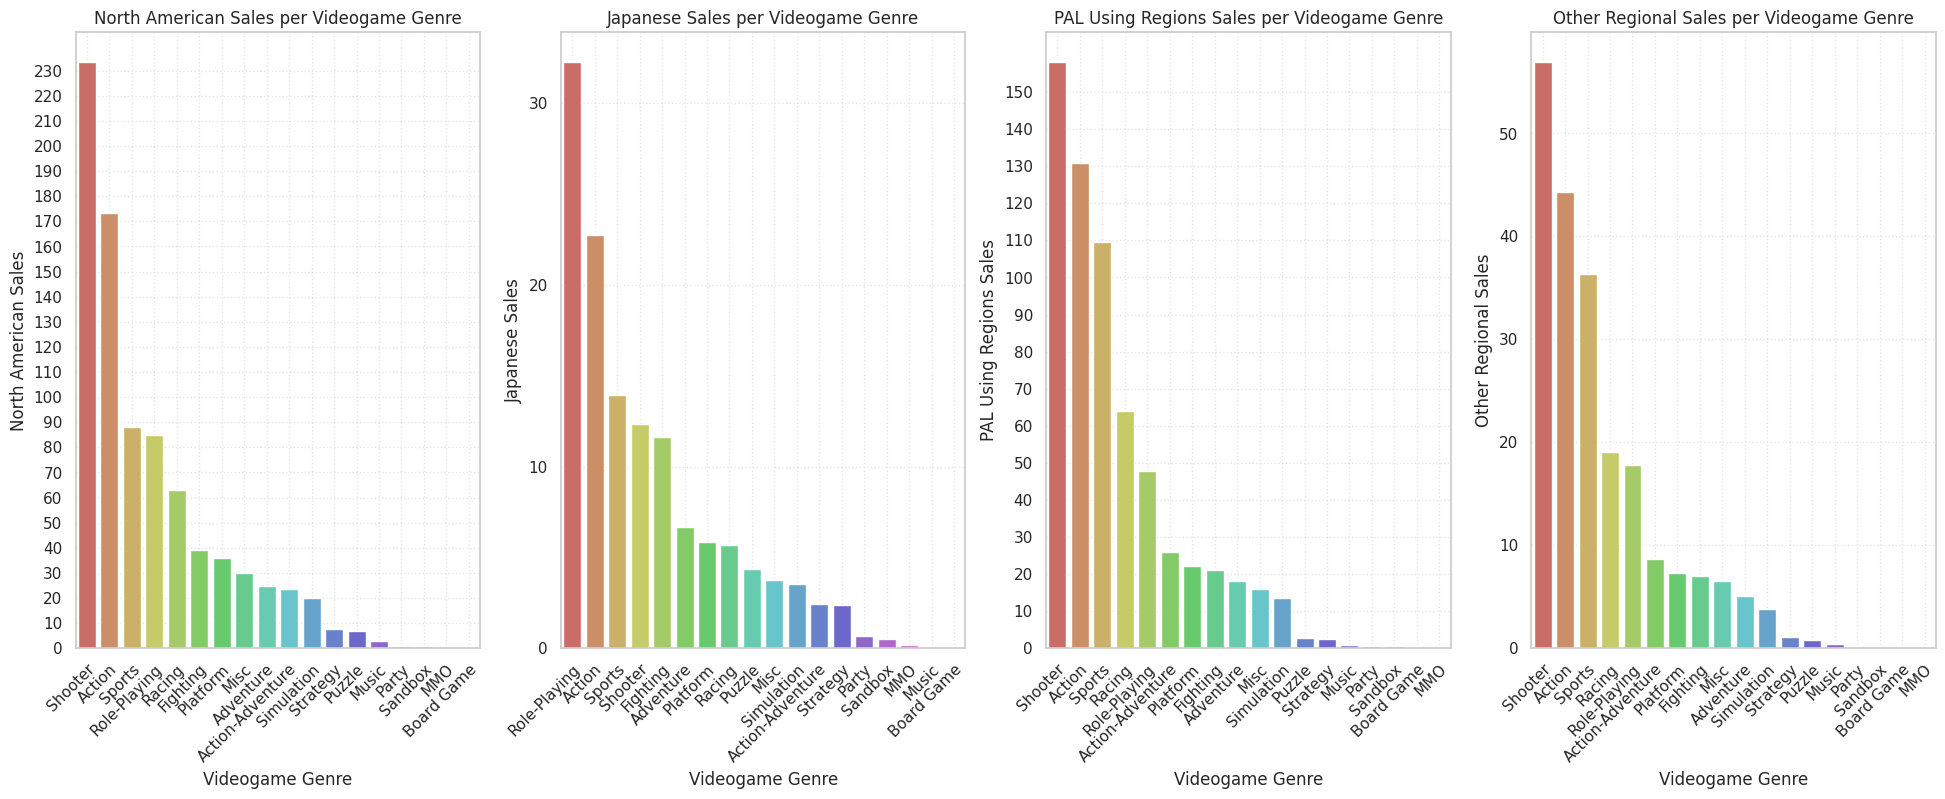

In [1282]:
# The most profitable genre:
def regional_sales_visualization():
  region_sales = ["na_sales", "jp_sales", "pal_sales", "other_sales"]
  fig, axes = plt.subplots(1, 4, figsize=(24, 8))

  for idx, region in enumerate(region_sales):
    category_x = "genre"
    count_y = region
    category_hue_z = category_x

    genre_sales = (
        vgdf.groupby(category_x, observed=True)[region]
        .sum()
        .reset_index()
        .sort_values(by=region, ascending=False)
    )
    y_tickspacing = np.arange(0, genre_sales[count_y].max() + 1, 10)


    sns.barplot(ax=axes[idx], data=genre_sales, x=category_x, y=count_y, palette="hls")

    axes[idx].set_title(f'{title_dict[count_y]} per {title_dict[category_x]}')
    axes[idx].set_xlabel(f'{title_dict[category_x]}')
    axes[idx].set_xticks(genre_sales[category_x])
    axes[idx].set_xticklabels(genre_sales[category_x], rotation=45, ha='right', rotation_mode='anchor')
    axes[idx].set_ylabel(f'{title_dict[count_y]}')
    axes[idx].set_yticks(y_tickspacing)
    axes[idx].grid(linestyle=':', alpha=0.5)
  plt.show()

regional_sales_visualization()

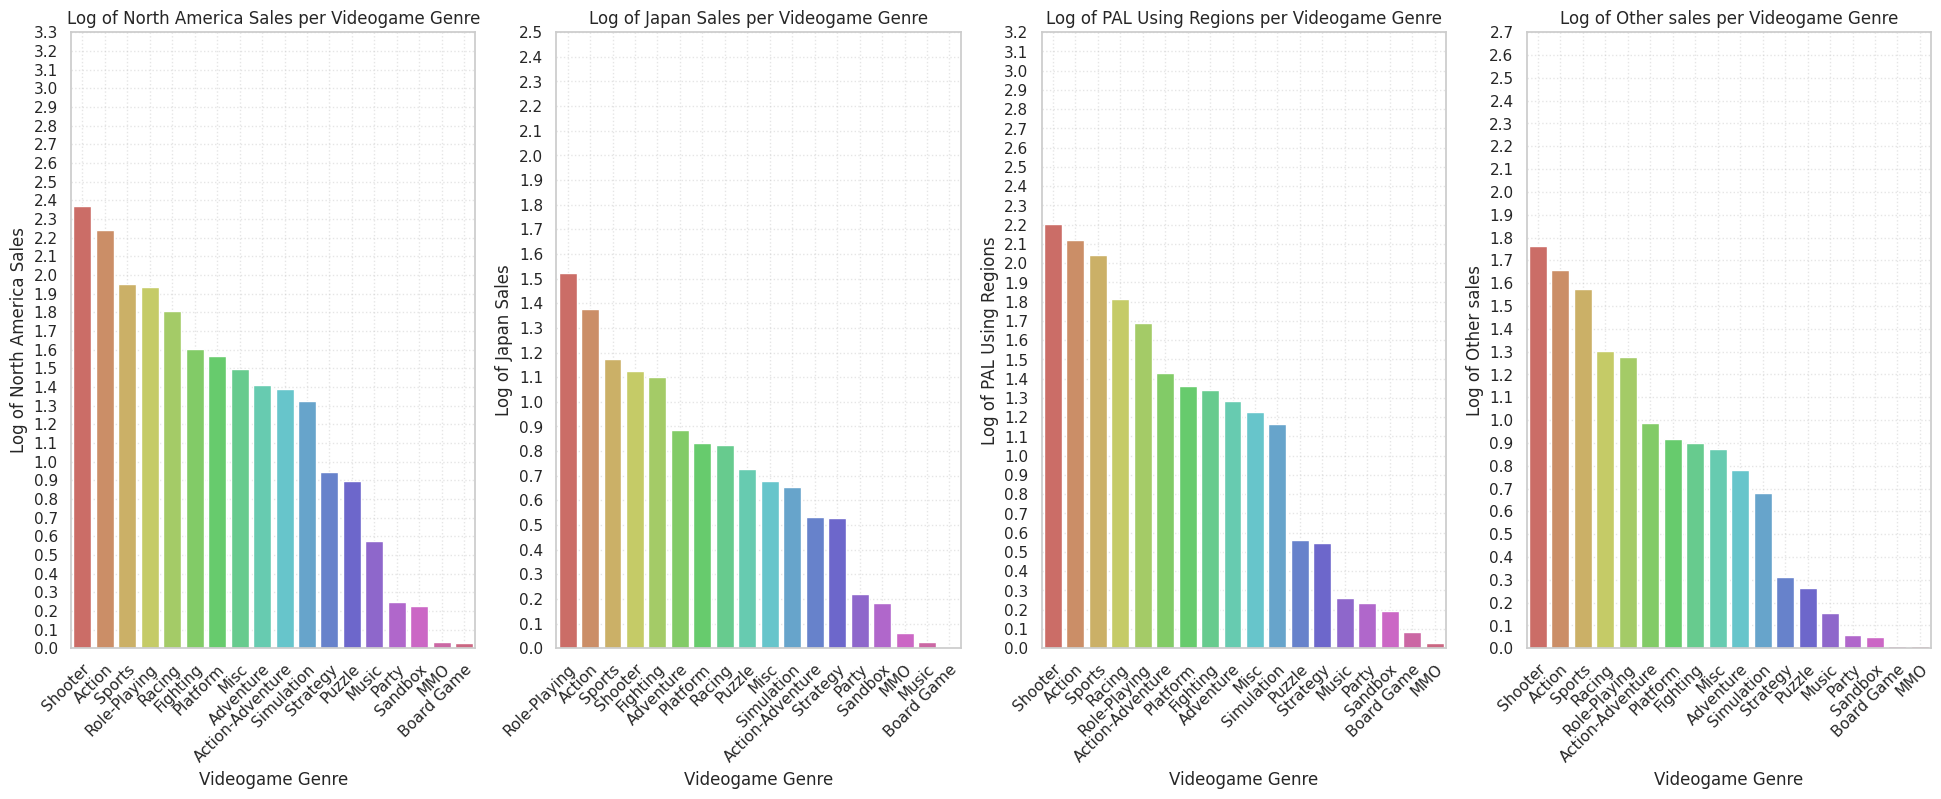

In [1283]:
# The most profitable genre:
def regional_sales_visualization():
  region_sales = ["na_sales", "jp_sales", "pal_sales", "other_sales"]
  fig, axes = plt.subplots(1, 4, figsize=(24, 8))

  for idx, region in enumerate(region_sales):
    category_x = "genre"
    count_y = region
    category_hue_z = category_x

    genre_sales = (
        vgdf.groupby(category_x, observed=True)[region]
        .sum()
        .reset_index()
        .sort_values(by=region, ascending=False)
    )
    log_count_y = f'log_{count_y}'

    genre_sales[log_count_y] = np.log10(genre_sales[count_y] + 1)
    y_tickspacing = np.arange(0, genre_sales[log_count_y].max() + 1, 0.1)


    sns.barplot(data=genre_sales, ax=axes[idx],  x=category_x, y=log_count_y, palette="hls")

    axes[idx].set_title(f'{title_dict[log_count_y]} per {title_dict[category_x]}')
    axes[idx].set_xlabel(f'{title_dict[category_x]}')
    axes[idx].set_xticks(genre_sales[category_x])
    axes[idx].set_xticklabels(genre_sales[category_x], rotation=45, ha='right', rotation_mode='anchor')
    axes[idx].set_ylabel(f'{title_dict[log_count_y]}')
    axes[idx].set_yticks(y_tickspacing)
    axes[idx].grid(linestyle=':', alpha=0.5)
  plt.show()

regional_sales_visualization()

The graph is stretched upwards to show the sales of the remaining genres. This is to further emphasize the difference in sales.

## 3.2. Release Date

### General Insights

Due to the nature of dates as data, viewing any statistics using the full dates would yield no useful results. Due to this, it was more feasible to bin the games according to the month and year they were released to see any trends. Some minor data cleaning is involved at this stage as the dataset included multiple entries for the same games separated by other values (mainly consoles). The dataset is grouped by the the game titles, and is filtered to return one entry per game with a set release date each.

In [1284]:
# Isolating the release_date column into its own Series
all_release_dates = vgdf.groupby('title')['release_date'].unique().explode().reset_index()['release_date']
all_release_dates_months = all_release_dates.dt.month.value_counts().sort_index()
all_release_dates_years = all_release_dates.dt.year.value_counts().sort_index()

all_release_dates_month_year = all_release_dates.dt.to_period('M').value_counts().sort_index()
date_range = pd.period_range(all_release_dates_month_year.index.min(), all_release_dates_month_year.index.max(), freq='M')
all_release_dates_month_year = all_release_dates_month_year.reindex(date_range, fill_value=0)

# Appending any missing years back into the Series
for year in all_release_dates_years.index:
    if year == all_release_dates_years.index[0]:
        continue

    if year - 1 not in all_release_dates_years.index:
        all_release_dates_years[year-1] = 0

all_release_dates_years.sort_index(inplace=True)

#### Are there trends or seasonalities for game releases?

In [1285]:
years_adfuller = adfuller(all_release_dates_years)
my_adfuller = adfuller(all_release_dates_month_year)

print(f"P-value for grouping by years: {years_adfuller[1]:.2f}")
print(f"P-value for grouping by years-months: {my_adfuller[1]:.2f}")

P-value for grouping by years: 0.24
P-value for grouping by years-months: 0.56


The Dickey-Fuller method is used to check if a dataset is stationary. Using the Augmented Dickey-Fuller method from `statsmodels.tsa.stattools` on the groupings for years and months with years return p-values of `0.24` and `0.56`, respectively. The p-value for the grouping by years and months with years is over `0.05`, meaning there should be some additional preprocessing before modelling any data related to this.

#### Which month is the most popular month for game releases?

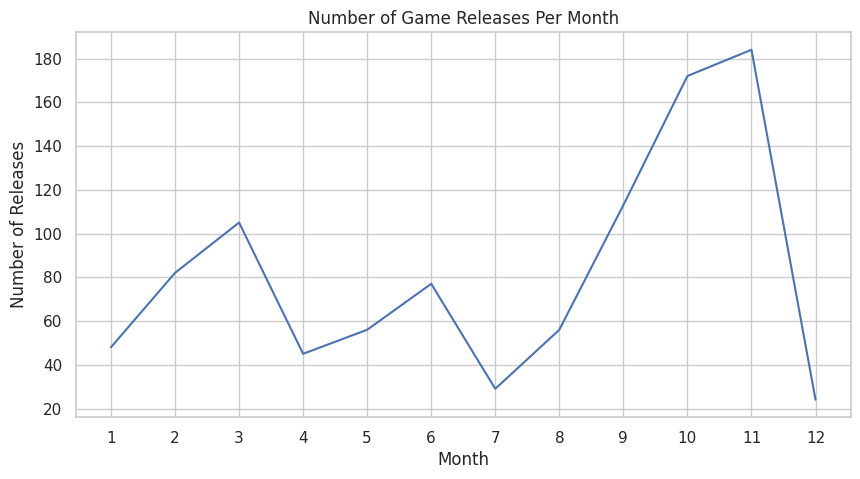

In [1286]:
# Plotting the releases per month
plt.figure(figsize=(10, 5))

sns.lineplot(data=all_release_dates_months)
plt.xticks(all_release_dates_months.index)

plt.title('Number of Game Releases Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.show()

From the chart, November emerges as the most popular release month, with October following behind. There is a significant drop in December releases - most likely due to the holidays. The increasing amount of releases prior to December could be attributed to the holiday rush, where developers aim to have their sales increase by marketing their games as holiday gifts. From January to March and April to June, there are some increases in release sales, which could be attributed to the spring and summer breaks respectively.

#### What is the general trend of game releases over time?

There have been a number of new consoles released in the past 10 years at least, let alone in the time span of the dataset. In the same way the release dates of the games were aggregated according to the month they were released, there may be some insights from aggregating them according to the year they were released.

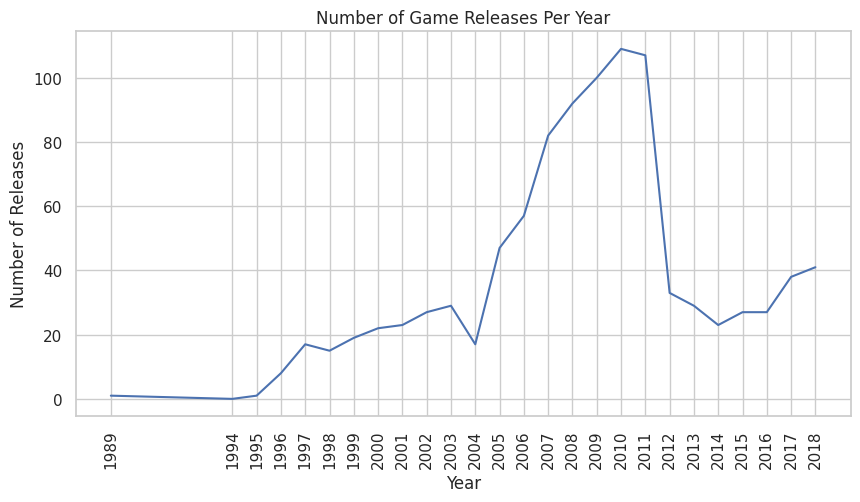

In [1287]:
# Plotting the releases per year
plt.figure(figsize=(10, 5))

sns.lineplot(data=all_release_dates_years)
plt.xticks(all_release_dates_years.index, rotation=90)

plt.title('Number of Game Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()


There is a visible upward trend leading up to 2009 and 2010, which is followed by a sudden drop and downward trend after those years. This spike in game releases and the consequent drop in the following years can be attributed to the massive popularity and death of the PSP, Xbox, Wii, and multiple other consoles at the time [8]. Developers were releasing games during these consoles' peak periods to meet demands. By the end of 2010, these consoles were decreasing in popularity, which also resulted in a decline of new game releases. The decline only about the various consoles decreasing in demand — the market was slowly shifting into the era of gaming that we have now.

### Global Sales Analysis

In [1288]:
all_sales_per_month = vgdf.groupby(vgdf['release_date'].dt.month)['log_total_sales'].sum().sort_index()
all_sales_per_year = vgdf.groupby(vgdf['release_date'].dt.year)['log_total_sales'].sum().sort_index()

year_month = vgdf['release_date'].dt.to_period('M')

all_sales_per_month_year = vgdf.groupby(year_month)['log_total_sales'].sum().sort_index()
date_range = pd.period_range(all_sales_per_month_year.index.min(), all_sales_per_month_year.index.max(), freq='M')
all_sales_per_month_year = all_sales_per_month_year.reindex(date_range, fill_value=0)

year_range = pd.RangeIndex(start=all_sales_per_year.index.min(), stop=all_sales_per_year.index.max() + 1, step=1)

# Reindexing to fill in missing years
all_sales_per_year = all_sales_per_year.reindex(year_range, fill_value=0)


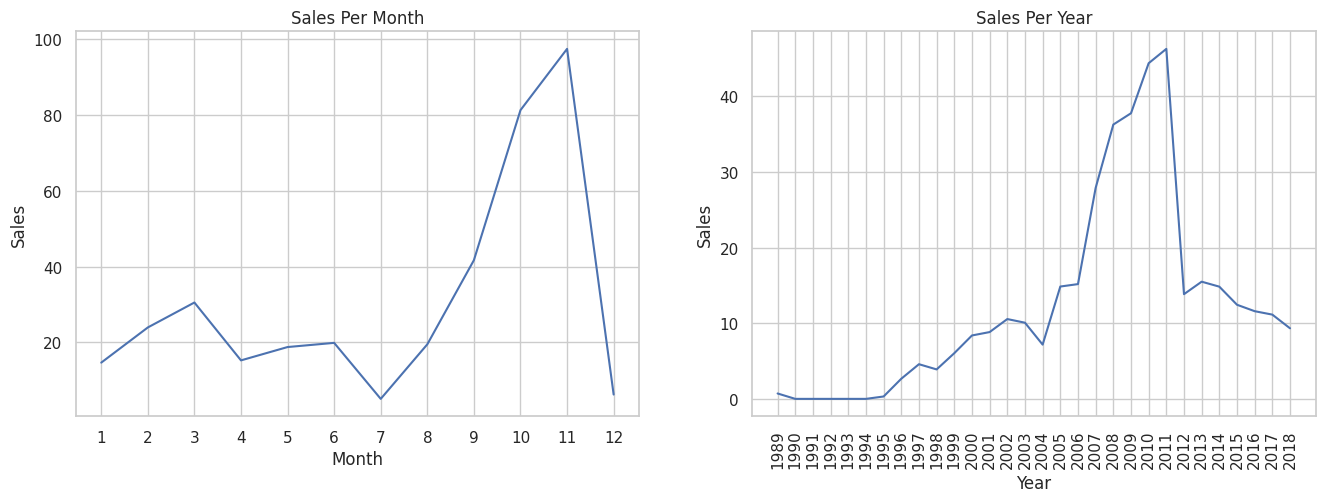

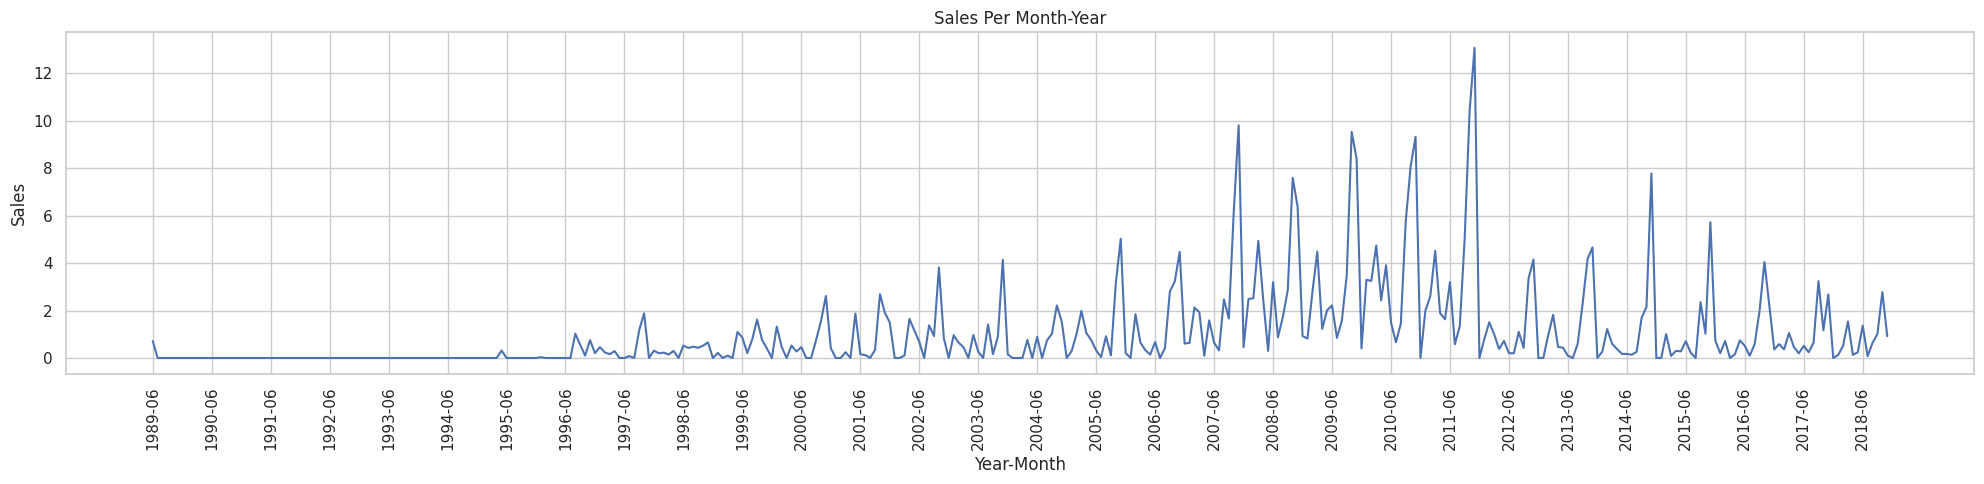

In [1289]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting the releases per year (all nulls dropped)
sns.lineplot(data=all_sales_per_month, ax=axes[0])
axes[0].tick_params(axis='x')
axes[0].set_xticks(all_sales_per_month.index)
axes[0].set_title('Sales Per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')

sns.lineplot(data=all_sales_per_year, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xticks(all_sales_per_year.index)
axes[1].set_title('Sales Per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')

plt.figure(figsize=(20, 5))

sns.lineplot(x=all_sales_per_month_year.index.astype(str), y=all_sales_per_month_year.values)
plt.xticks(all_sales_per_month_year.index.astype(str)[::12], rotation=90)
plt.title('Sales Per Month-Year')
plt.xlabel('Year-Month')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

A general overview of how total sales are plotted across months, years, and year-month periods can reveal trends in revenue generation for games released during specific time frames.

In the `Sales per Month` graph, November is plotted as the most successful month to release video games, followed by October. This corresponds well to the `Number of Game Releases Per Month` graph where the aforementioned months also have the highest count of game releases. The same can be observed for the `Sales per Year` graph. However, these are already expected just from looking at the game releases graphs alone, so this shall be treated as supplementary information.

An additional view was made to check the sales trends for months and years. As the series approaches the more recent years, the peaks in sales increases significantly. Looking closer, these peaks usually occur every October, which matches what was observed in the month graphs. For this portion, there is seasonality in total sales of a game based on the month they are released in. This is also supported by running an ADF test for the data.

In [1290]:
years_adfuller = adfuller(all_sales_per_year)
my_adfuller = adfuller(all_sales_per_month_year)

print(f"P-value for grouping by years: {years_adfuller[1]:.2f}")
print(f"P-value for grouping by years-months: {my_adfuller[1]:.2f}")

P-value for grouping by years: 0.13
P-value for grouping by years-months: 0.52


Both groupings that involve years still stay consistent with p-values that exceed 0.05. Should these be used for future calculations, some pre-processing is expected to make the data stationary.

## 3.3. Publisher vs. Developer

### General Insights

#### How many developers and publishers are there?

In [1291]:
dev_count = len(vgdf['developer'].unique())
pub_count = len(vgdf['publisher'].unique())

print("Number of Developers: ", dev_count)
print("Number of Publishers: ", pub_count)

Number of Developers:  400
Number of Publishers:  84


#### How many companies act as both publisher and developer?

In [1292]:
pub = set(vgdf['publisher'].unique())
dev = set(vgdf['developer'].unique())
pubdev = pub & dev

print(f"Number of companies acting as both Publisher and Developer: {len(pubdev)}")
print("Examples:", list(pubdev)[:10])

Number of companies acting as both Publisher and Developer: 28
Examples: ['Ubisoft', 'Atlus', 'Capcom', 'Nippon Ichi Software', 'Telltale Games', 'Rockstar Games', 'Codemasters', 'Mojang', 'Arc System Works', 'EA Sports']


#### What are the most common publishers and developers?

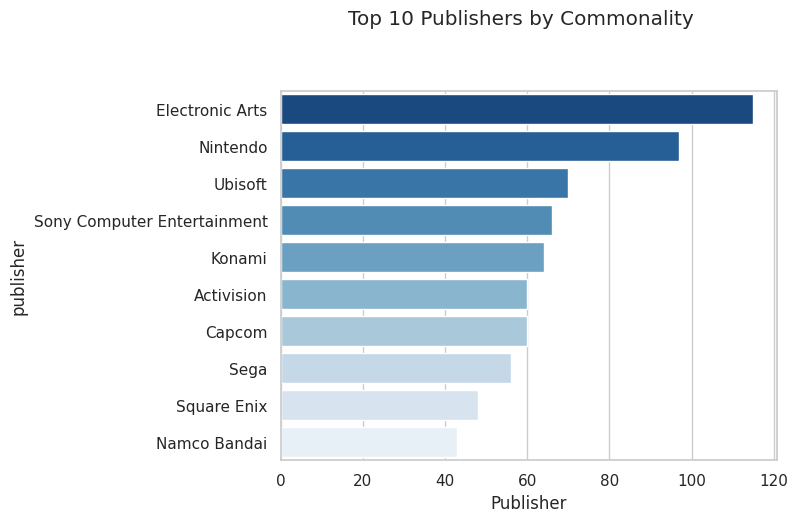

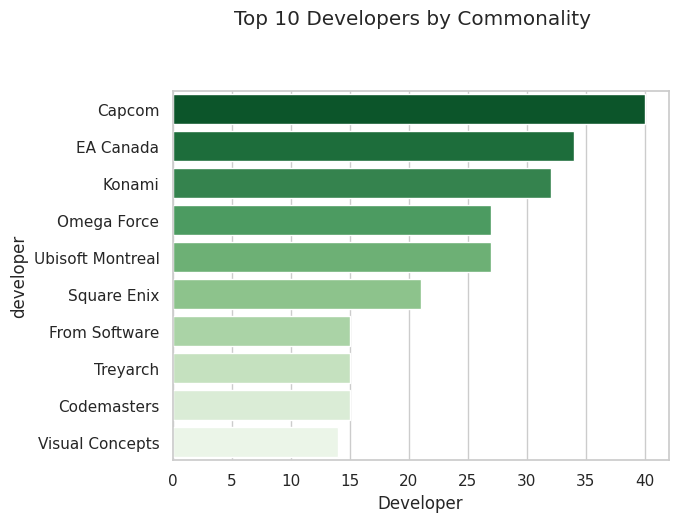

In [1293]:
top_pub = vgdf["publisher"].value_counts().head(10).reset_index()
top_dev = vgdf["developer"].value_counts().head(10).reset_index()

sns.set_theme(style="whitegrid")

# Publisher Sales Plot
pub_plot = sns.barplot(
    data=top_pub,
    y="publisher",
    x='count',
    hue="publisher", palette="Blues_r", legend=False
)
pub_plot.set_xlabel("Publisher")
pub_plot.figure.suptitle("Top 10 Publishers by Commonality", y=1.05)
plt.show()
# Developer Sales Plot
dev_plot = sns.barplot(
    data=top_dev,
    y="developer",
    x='count',
    hue="developer", palette="Greens_r", legend=False
)
dev_plot.set_xlabel("Developer")
dev_plot.figure.suptitle("Top 10 Developers by Commonality", y=1.05)
plt.show()

To summarize our general insights about publisher and developers, There are more developers than there are publishers. Out of that amount of publishers and developers, there are 28 companies listed as both a developer and publisher. From the most common publishers and developers, we can see from the table that publishers appear more frequently compared to developers in our dataset. This may be the case as we can see that from our top 10, EA (or Electronic Arts) has different developers under their company (EA Canada and EA Black Box). The differentiation on the developing group may be the reason why we have a larger count on developers compared to the publishers as well.

### Global Sales Analysis

#### Which publishers and developers earn more revenue in global sales?

Text(0.5, 1.05, 'Top 10 Developers by Global Sales')

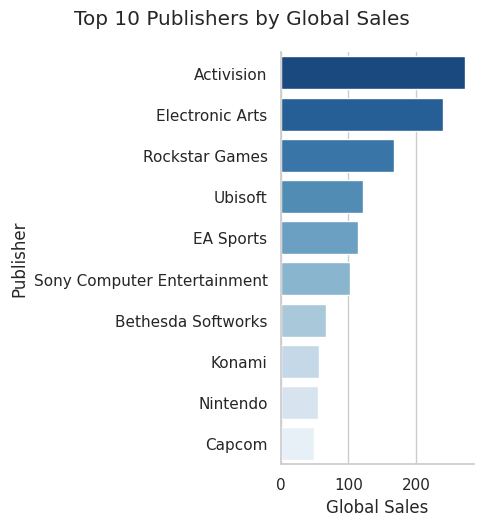

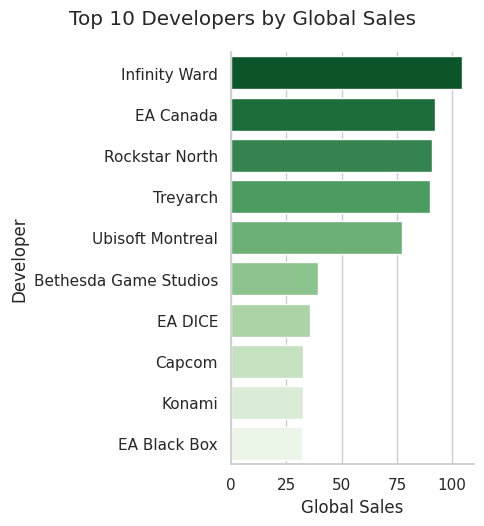

In [1294]:
pub_sales = vgdf.groupby("publisher")["total_sales"].sum().nlargest(10).reset_index()
dev_sales = vgdf.groupby("developer")["total_sales"].sum().nlargest(10).reset_index()

sns.set_theme(style="whitegrid")

# Publisher Sales Plot
pub_plot = sns.catplot(
    data=pub_sales,
    y="publisher", x="total_sales", kind="bar",
    hue="publisher", palette="Blues_r", legend=False
)
pub_plot.set_axis_labels("Global Sales", "Publisher")
pub_plot.figure.suptitle("Top 10 Publishers by Global Sales", y=1.05)

# Developer Sales Plot
dev_plot = sns.catplot(
    data=dev_sales,
    y="developer", x="total_sales", kind="bar",
    hue="developer", palette="Greens_r", legend=False
)
dev_plot.set_axis_labels("Global Sales", "Developer")
dev_plot.figure.suptitle("Top 10 Developers by Global Sales", y=1.05)

The plot presents the top 10 performing publishers and developers are based on their global sales. However, we can also see that the sales based on publishers are higher in comparison to the developers.

#### What are the top performing games for the publishers and developers?

In [1295]:
# Group by title and aggregate relevant columns
grouped = vgdf.groupby("title", as_index=False).agg({
    "publisher": "first",
    "developer": "first",
    "release_date": "first",
    "total_sales": "sum"
})

# Sort by total sales and get top 10
top_games = grouped.sort_values("total_sales", ascending=False).head(10)

# Adjust the index to start from 1
top_games.index = range(1, len(top_games) + 1)

# Rename columns
top_games = top_games.rename(columns={
    "title": "Title",
    "publisher": "Publisher",
    "developer": "Developer",
    "release_date": "Release Date",
    "total_sales": "Total Sales"
})

# Ensure release date shows only the date
top_games["Release Date"] = top_games["Release Date"].dt.strftime("%Y-%m-%d")

# Display the table with formatted sales
top_games[["Title", "Publisher", "Developer", "Release Date", "Total Sales"]].style \
    .format({"Total Sales": "{:.2f}"}) \
    .set_table_attributes("style='display:inline'")

,Title,Publisher,Developer,Release Date,Total Sales
1,Grand Theft Auto V,Rockstar Games,Rockstar North,2013-09-17,48.43
2,Call of Duty: Modern Warfare 3,Activision,Infinity Ward,2011-11-08,28.17
3,Call of Duty: Black Ops II,Activision,Treyarch,2012-11-13,27.66
4,Call of Duty: Black Ops,Activision,Treyarch,2010-11-09,27.41
5,Call of Duty: Ghosts,Activision,Infinity Ward,2013-11-05,25.06
6,Call of Duty: Modern Warfare 2,Activision,Infinity Ward,2009-11-10,24.14
7,Grand Theft Auto IV,Rockstar Games,Rockstar North,2008-04-29,21.66
8,Call of Duty: Advanced Warfare,Activision,Sledgehammer Games,2014-11-04,21.36
9,Call of Duty 4: Modern Warfare,Activision,Infinity Ward,2007-11-05,17.18
10,The Elder Scrolls V: Skyrim,Bethesda Softworks,Bethesda Game Studios,2011-11-11,16.52


To better understand which individual titles have performed the best in terms of global sales, we use the game title in order to group the dataset due to the fact that some games may appear multiple times in the dataset due to different console release dates. We then aggregated the total sales per title.

* The total sales are summed up in order to reflect the combined global performance of each game.
* The release date shown is the initial release date.
* The index is adjusted to start from 1 to make it more presentable.

Since this view focuses on the actual games, the distinction between publishers and developers does not affect the ranking. Therefore, this portion aims to showcase the top 10 performing games and reflect who developed and published it.

##3.4 Game Franchises

In [1296]:
# Place cleanfile.csv in the same directory as this jupyter notebook.
franchise_vgdf = pd.read_csv('cleanfile.csv')

### General Insights

A game franchise is generally defined as a collection of distinct video games or video game series. Since the original data set does not have the franchise available, manual feature engineering was performed based on the title of the game and searching for the name of its respective game franchise. This was the preferable option as games belonging to the same franchise can have varying titles without common words or phrases in them. Certain games that have the same name as their franchise are marked with the "(series)" label so as to not conflict with command logic later on.

#### How many Game Franchises are there?

In [1297]:
#Total Number of Unique Franchises
num_franchises = franchise_vgdf['franchise'].drop_duplicates().value_counts().sum()
print("Total Number of Unique Franchises: ", num_franchises)

Total Number of Unique Franchises:  462


#### How many games are there for each Game Franchises?

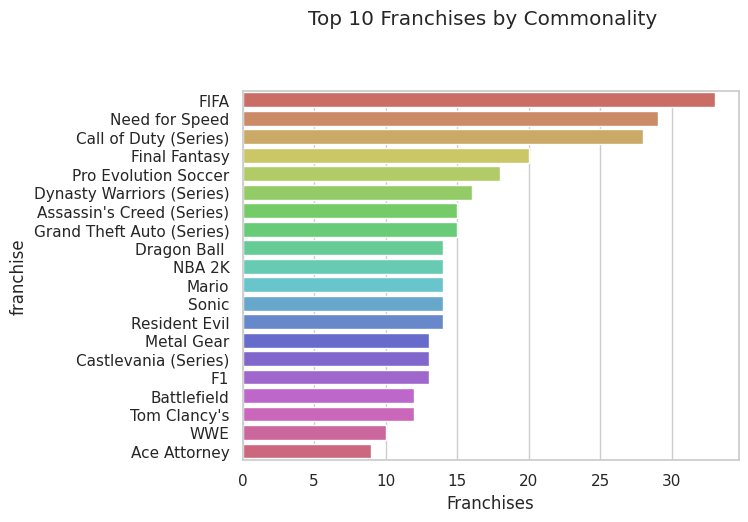

In [1298]:
#Number of Games belonging to Each Franchise

#Uncomment the code below to see all
# pd.set_option('display.max_rows', None)
# franchise_vgdf['franchise'].value_counts()

franchises_plot = franchise_vgdf['franchise'].value_counts().head(20).reset_index()

# Developer Sales Plot
franchise_plot = sns.barplot(
    data=franchises_plot,
    y="franchise",
    x='count',
    hue="franchise", palette="hls", legend=False
)
franchise_plot.set_xlabel('Franchises')
franchise_plot.figure.suptitle("Top 10 Franchises by Commonality", y=1.05)
plt.show()

#### How many Standalone Games are there?

In [1299]:
#Standalone Game Label
franchise_vgdf['standalone'] = np.where(franchise_vgdf['title'] == franchise_vgdf['franchise'], 1, 0)
franchise_vgdf[['title', 'franchise', 'standalone']].drop_duplicates()
franchise_vgdf['standalone'].value_counts()

print("Number of Franchise Games: ", len(franchise_vgdf[franchise_vgdf['standalone'] == 0]))
print("Number of Standalone Games: ",len(franchise_vgdf[franchise_vgdf['standalone'] == 1]))

Number of Franchise Games:  1035
Number of Standalone Games:  175


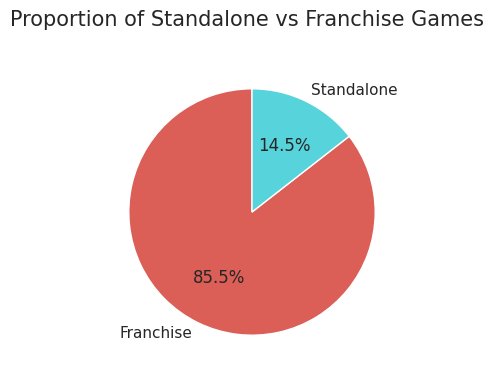

In [1300]:
#Ratio of Standalone Games
pie_counts = franchise_vgdf['standalone'].value_counts()
pie_labels = ['Franchise', 'Standalone']
palette = sns.color_palette('hls', n_colors=2)

plt.figure(figsize=(4, 4))
plt.pie(pie_counts, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=palette)
plt.suptitle('Proportion of Standalone vs Franchise Games', y=1, fontsize=15)
plt.show()

### Global Sales Analysis

#### What are the Highest-Selling Game Franchises?

Text(0.5, 1.04, 'Top 10 Game Franchises by Global Sales')

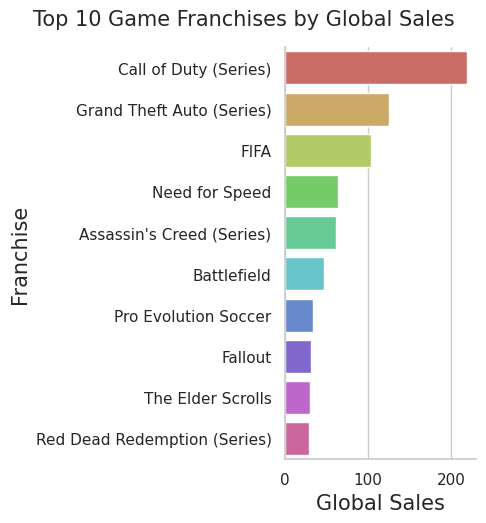

In [1301]:
#Top 10 Game Franchises by Global Sales

# Group Total Sales by Frachise
franchise_sales = franchise_vgdf.groupby('franchise')['total_sales'].sum().reset_index()

# Sort Values in Descending Order
top_franchises = franchise_sales.sort_values(by='total_sales', ascending=False).head(10)

# Resets the Index & Sets it to 1-based indexing
top_franchises.reset_index(drop=True, inplace=True)
top_franchises.index += 1

# Plotting a horizontal bar chart
franchise_plot = sns.catplot(data=top_franchises,
                             y='franchise', x='total_sales', kind='bar',hue='franchise',palette='hls', legend=False)
franchise_plot.set_axis_labels('Global Sales', 'Franchise', fontsize=15)
franchise_plot.figure.suptitle('Top 10 Game Franchises by Global Sales', y=1.04, fontsize=15)

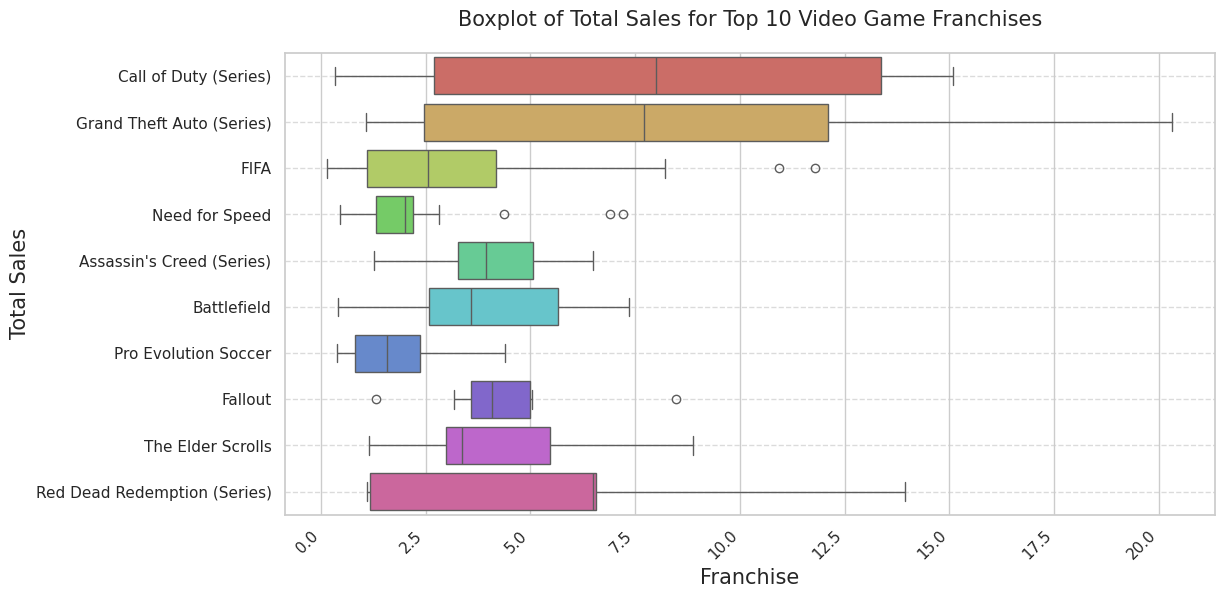

In [1302]:
# Select the top 10 franchises based on total sales
franchise_stats = franchise_vgdf.groupby('franchise')['total_sales'].agg(['sum','mean', 'std', 'min', 'max', 'count']).sort_values(by='sum', ascending=False).head(10)
top_franchises = franchise_stats.index  # Extract franchise names
filtered_data = franchise_vgdf[franchise_vgdf['franchise'].isin(top_franchises)]  # Filter dataset

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_sales', y='franchise', data=filtered_data, order=top_franchises, palette="hls")

# Beautify plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel("Franchise", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.title("Boxplot of Total Sales for Top 10 Video Game Franchises", y=1.04, fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### What Game Franchises have the Most Games?

In [1303]:
# Franchises with the Most Number of Unique Games

unique_games = franchise_vgdf[['title', 'franchise']].drop_duplicates()

unique_games['franchise'].value_counts()

franchise_games = pd.DataFrame()
franchise_games['franchise'] = unique_games['franchise'].drop_duplicates()
franchise_games['total_games'] = franchise_games['franchise'].apply(lambda franchise: (unique_games['franchise'] == franchise).sum())


games_table = franchise_games.sort_values(by='total_games', ascending=False).head(10)
print(games_table.to_string(index=False))

            franchise  total_games
                 FIFA           19
        Final Fantasy           16
Call of Duty (Series)           15
       Need for Speed           15
                Mario           13
 Castlevania (Series)           12
           Metal Gear           11
                Sonic           10
                   F1           10
 Pro Evolution Soccer           10


Text(0.5, 1.04, 'Top 10 Game Franchises by Number of Unique Games')

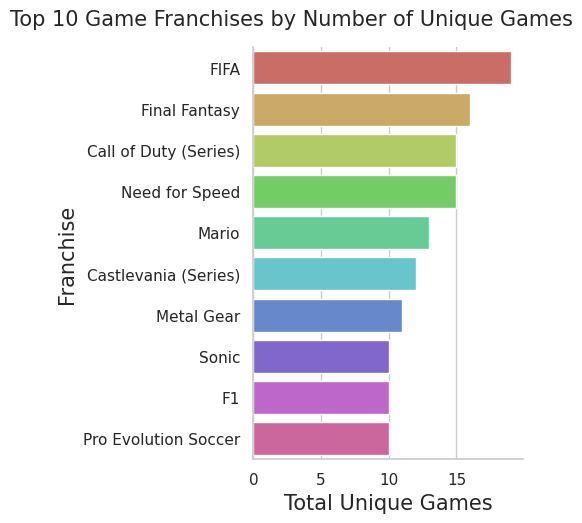

In [1304]:
# Franchises with the Most Number of Unique Games (With the Plot)

# Resets the Index & Sets it to 1-based indexing

# Plotting a horizontal bar chart
games_table_plot = sns.catplot(data=games_table,
  y = 'franchise',
  x = 'total_games',
  kind='bar',
  hue='franchise',
  palette='hls',
  legend=False
)
games_table_plot.set_axis_labels('Total Unique Games', 'Franchise', fontsize=15)
games_table_plot.figure.suptitle('Top 10 Game Franchises by Number of Unique Games', y=1.04, fontsize=15)

In terms of global sales, some of the highest selling franchises (in descending order) include Call of Duty, Grand Theft Auto, FIFA, Need for Speed, and Assassin’s Creed. Though FIFA and Final Fantasy have the largest roster of games, the COD and GTA franchises sell more copies of games overall. Additionally, though FIFA is the 3rd highest selling franchise, it sells less copies per game on average than other franchises within the top 10. Another aspect of note is that one of the games in the Red Dead Redemption Franchise has sold more copies than games belonging to most of the other top 10 franchises.


#### How do Standalone Games compare to Series/Franchise Games?

Text(0.5, 1.04, 'Top 10 Standalone Games by Global Sales')

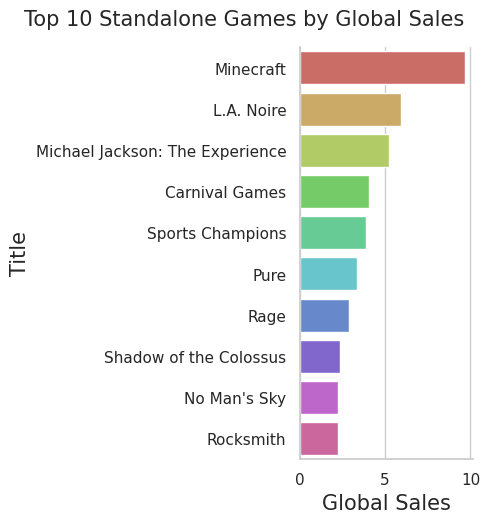

In [1305]:
#Top 10 Standalone Games by Global Sales

# Group Total Sales by Standalone
standalone_sales = franchise_vgdf[franchise_vgdf['standalone'] == 1].groupby('franchise')['total_sales'].sum().reset_index()

# Sort Values in Descending Order
top_standalone = standalone_sales.sort_values(by='total_sales', ascending=False).head(10)

# Resets the Index & Sets it to 1-based indexing
top_standalone.reset_index(drop=True, inplace=True)
top_standalone.index += 1

# Plotting a horizontal bar chart
standalone_plot = sns.catplot(data=top_standalone,
                             y='franchise', x='total_sales', kind='bar',hue='franchise',palette='hls', legend=False)
standalone_plot.set_axis_labels('Global Sales', 'Title', fontsize=15)
standalone_plot.figure.suptitle('Top 10 Standalone Games by Global Sales', y=1.04, fontsize=15)


Text(0.5, 1.04, 'Top 10 Franchise Games by Global Sales')

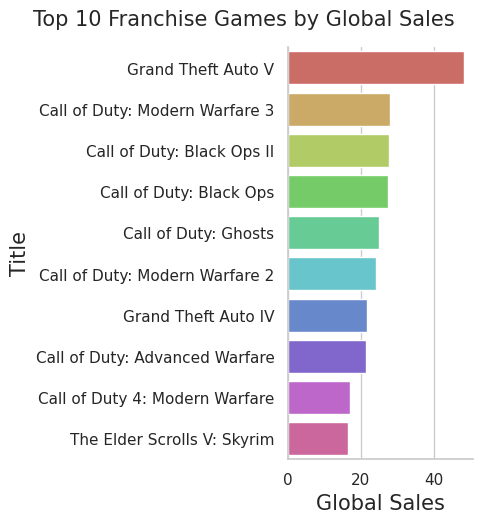

In [1306]:
#Top 10 Franchise Games by Global Sales

# Group Total Sales by Standalone
series_sales = franchise_vgdf[franchise_vgdf['standalone'] == 0].groupby('title')['total_sales'].sum().reset_index()

# Sort Values in Descending Order
top_series = series_sales.sort_values(by='total_sales', ascending=False).head(10)

# Resets the Index & Sets it to 1-based indexing
top_series.reset_index(drop=True, inplace=True)
top_series.index += 1

# Plotting a horizontal bar chart
series_plot = sns.catplot(data=top_series,
                             y='title', x='total_sales', kind='bar',hue='title',palette='hls', legend=False)
series_plot.set_axis_labels('Global Sales', 'Title', fontsize=15)
series_plot.figure.suptitle('Top 10 Franchise Games by Global Sales', y=1.04, fontsize=15)

In [1307]:

top_games = pd.DataFrame({
    "Top Standalone Games": top_standalone['franchise'],
    "Global Standalone Sales": top_standalone['total_sales'],
    "Top Franchise Games": top_series['title'],
    "Global Franchise Sales": top_series['total_sales']
})

# Adjusting the index to represent numbering starting from 1
top_games.index = range(1, len(top_games) + 1)
top_games

,Top Standalone Games,Global Standalone Sales,Top Franchise Games,Global Franchise Sales
1,Minecraft,9.69,Grand Theft Auto V,48.43
2,L.A. Noire,5.94,Call of Duty: Modern Warfare 3,28.17
3,Michael Jackson: The Experience,5.24,Call of Duty: Black Ops II,27.66
4,Carnival Games,4.06,Call of Duty: Black Ops,27.41
5,Sports Champions,3.88,Call of Duty: Ghosts,25.06
6,Pure,3.36,Call of Duty: Modern Warfare 2,24.14
7,Rage,2.92,Grand Theft Auto IV,21.66
8,Shadow of the Colossus,2.34,Call of Duty: Advanced Warfare,21.36
9,No Man's Sky,2.26,Call of Duty 4: Modern Warfare,17.18
10,Rocksmith,2.26,The Elder Scrolls V: Skyrim,16.52


From the bar plots indicated above, it can be observed that games belonging to a larger franchise generally have greater sales than standalone games. All of the top 10 franchise games reach sales numbers higher than all of the top 10 standalone games. Additionally, the majority of the top 10 franchise or non-standalone games belong to the Call of Duty franchise.

## 3.5. Box Art Images

A video game title’s box art is any illustration or visual design that represents it whether it is a physical copy or digitally bought one [9]. These are what potential customers see before they decide to buy a product, so it is an essential factor in determining a video game series’s success. There are multiple ways to analyze an image in terms of the objects present, the characters shown, the text displayed, and the textures used; however, these require advanced techniques that are outside the scope of the paper. The only factor that can be considered is the colors used. The manipulation of colors is key to signal information to the user of what kind of game it is, so it may be worth investigating it.


### HSV Histogram
There are many different ways to represent colors in a computerized way, one of them is through the RGB color space which defines every color with some linear combination of pure red, green, and blue. Although the RGB color space is straightforward by definition, it is very convoluted to represent more complicated colors. For example, white is a combination of full red, green, and blue values, yet black is the absence of all three. A more human-compatible alternative is to represent colors through the HSV color space. Hue represents what kind of color it is, saturation is the strength of color present, and value is the brightness of the color.

[  7.5  22.5  37.5  52.5  67.5  82.5  97.5 112.5 127.5 142.5 157.5 172.5] [0.26451934 0.16012088 0.0536123  0.0324638  0.02399769 0.02527333
 0.13617924 0.13871501 0.04391364 0.01665315 0.01886081 0.08486368]
0.9991728776137772


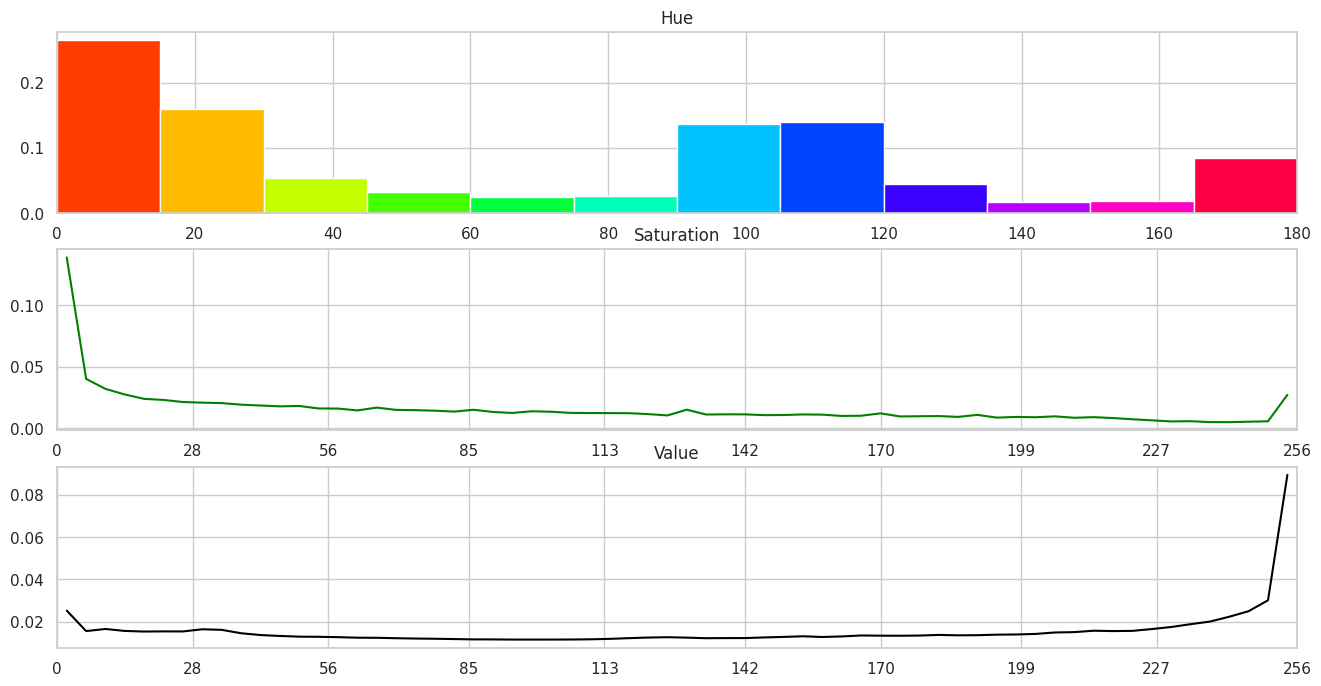

In [1308]:
apply_all           = lambda apply, h, s, v : (apply(h), apply(s), apply(v))
channel_mean        = lambda name : vgdf[name].mean()
def stack_mean(channel):
  valid_arrays = [
      arr for arr in vgdf[channel].values
      if isinstance(arr, np.ndarray) and arr.shape == vgdf[channel].values[0].shape
  ]

  if not valid_arrays:
      print(f"[ERROR] - No valid arrays for {channel}")
      return np.zeros(HUE_BSIZE)  # Default to zero if nothing is valid

  stacked = np.stack(valid_arrays)
  stacked = np.nan_to_num(stacked, nan=0.0)  # Replace NaNs with 0
  return stacked.mean(axis=0)

def plot_hsv_hist():
  h, s, v = apply_all(stack_mean, 'hist_hue', 'hist_sat', 'hist_val')
  fig, axes = plt.subplots(3, 1, figsize=(16, 8))

  adjusted_pos = lambda cap, bin_step_size : (
    np.linspace(0, cap, bin_step_size, endpoint=False) + (cap / bin_step_size) / 2
  )

  hue_x_pos = adjusted_pos(180, HUE_BSIZE)
  sat_x_pos = adjusted_pos(256, GEN_BSIZE)
  val_x_pos = adjusted_pos(256, GEN_BSIZE)
  print(hue_x_pos, h)
  print(np.sum(h))

  hue_colors = np.array(
    [[h, 255, 255] for h in hue_x_pos.astype(np.uint8)], dtype=np.uint8
  ).reshape(-1, 1, 3)  # Ensure shape (N, 1, 3)

  hue_colors = (
    cv2.cvtColor(hue_colors, cv2.COLOR_HSV2RGB)             # To RGB
    .reshape(-1, 3) / 255                                   # Flatten down to three (n, 3)
  )

  def hist_custom(ax, name, top_limit=256):
    ax.set_title(name)
    ax.set_xlim([0, top_limit])
    ax.set_xticks(np.linspace(0, top_limit, 10, dtype=int))

  axes[0].bar (hue_x_pos, h, color=hue_colors, width=180/HUE_BSIZE)
  hist_custom(axes[0], "Hue", top_limit=180)
  axes[1].plot(sat_x_pos, s, color='green')
  hist_custom(axes[1], "Saturation")
  axes[2].plot(val_x_pos, v, color='black')
  hist_custom(axes[2], "Value")

  plt.show()

plot_hsv_hist()

### EDA Question for Box Art Image
**What Color Palettes are Dominant in Box Art Images?**

Color palettes consist of a range of colors that are dominant in a series’ box art. Knowing what range of colors are used in major titles is key for a company to design their box art to attract customers. To classify an artwork’s color palette classification, the count of color must be known through the HSV histogram that is then normalized to an area of one.

It is important to note that any colors on the gray scale tend to have a default hue of zero, thus it is best to mask very unsaturated colors and colors that are close to black and white, so as to be limited to colors with some notion of vibrancy.


{'clr_warm': {True: 986, False: 223}, 'clr_green': {False: 1056, True: 153}, 'clr_cool': {True: 716, False: 493}, 'clr_purple': {False: 975, True: 234}, 'clr_black': {False: 1147, True: 62}, 'clr_white': {False: 986, True: 223}, 'clr_grays': {False: 855, True: 354}, 'clr_very_sat': {True: 728, False: 481}}
       clr_warm  clr_green  clr_cool  clr_purple  clr_black  clr_white  \
True        986        153       716         234         62        223   
False       223       1056       493         975       1147        986   

       clr_grays  clr_very_sat  
True         354           728  
False        855           481  


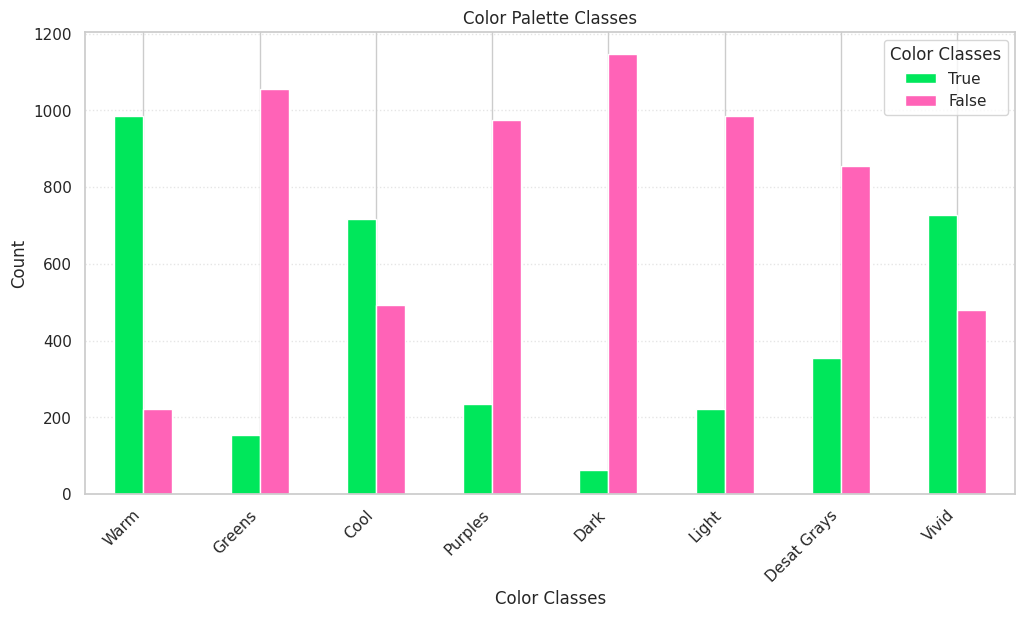

In [1309]:
def show_color_classification():
  # Count True (1) and False (0) values for each category
  classification_counts = {col: vgdf[col].value_counts().to_dict() for col in classification_cols.keys()}
  # Convert to a DataFrame
  print(classification_counts)
  classification_df = pd.DataFrame(classification_counts).fillna(0).astype(int)
  classification_df.index = ["True", "False"]  # Rename index for clarity
  print(classification_df)

  classification_df.T.loc[:, ["True", "False"]].plot(kind='bar', figsize=(12, 6), color=['#00e75b', '#ff63b7'])

  plt.title("Color Palette Classes")
  plt.xlabel("Color Classes")
  plt.ylabel("Count")
  plt.xticks(np.arange(len(classification_cols)), classification_cols.values(), rotation=45, ha="right")
  plt.legend(title="Color Classes", loc="upper right")
  plt.grid(axis="y", linestyle=":", alpha=0.5)
  plt.show()

show_color_classification()

Based on a Threshold Value of 0.4 and a Saturation Value of 0.4, the widely most prominent color palette are those in the warm ranges. This is then followed by the cool color palette, then the purples, then the greens.

There seems to be too little video games that are in the gray scale.

Additionally, most video games are said to be vivid, as evidenced by the graph. This may support the idea that many video game developers tend to market their video game title with catchy and vibrant video game box art.

# 4. Research Question

**What key factors influence the marketability and commercial success of a video game?**

**Scope**:

It will utilize the total sales of each game to compare against the variables discussed earlier, such as the release date, the genre, the publishers and developers and others to find what variables have the most impact in generating high sales.

**Significance**:

Understanding the factors that drive a game's marketability can help developers and publishers optimize marketing strategies and game design decisions. This research provides insights into consumer preferences and the key elements that contribute to a game's commercial success. Additionally, it can assist investors and industry analysts in predicting the viability of upcoming titles. The findings may also be used to forecast trends in game development and sales performance, ultimately shaping future industry strategies.

# 5. Statistical Inferences

As there are multiple variables that contribute to a game's marketability and commercial success, each of these will be tested against the main research question by dividing them into sub-hypotheses.

## 5.1 Genre

### Are `console` and `genre` associated?

H<sub>0</sub>: There is no association between the type of console and the game genre released.

H<sub>1</sub>: There is an association between console type and genre.

In [1310]:
# Contingency table
contingency_table = pd.crosstab(vgdf["console"], vgdf["genre"])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 688.0303068989401
p-value: 3.031959009812455e-23


Because our p-value is extremely small, we reject the null hypothesis. Therefore, there is a strong statistical evidence to conclude that console and genre are not independent. Which means that there are certain genres that are more likely to appear on specific consoles.

### Is there an interaction between `console` and `genre` on `total sales`?

H<sub>0</sub>: There is no interaction between console and genre on total sales.

H<sub>1</sub>: there is an interaction between console and genre on total sales.

In [1311]:
# Make sure genre and console are categorical
vgdf["genre"] = vgdf["genre"].astype("category")
vgdf["console"] = vgdf["console"].astype("category")

# Fit the two-way ANOVA model
model = ols("total_sales ~ C(console) * C(genre)", data=vgdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq      df         F    PR(>F)
C(console)            196.203872    21.0  2.138714  0.024067
C(genre)              199.896220    17.0  2.691660  0.009124
C(console):C(genre)  1577.288628   357.0  1.011364  0.450716
Residual             4495.218897  1029.0       NaN       NaN


Based on the results, console has a strong effect on total sales and certain consoles are associated with significantly higher or lower sales. Genre has also a statistically significant effect on total sales in this model.

However, there is no significant interaction between console and genre, meaning that the effect of genre on the total sales does not significantly vary across different consoles and different genres.

### Is there a difference between Genre in terms of Total Sales?

H<sub>0</sub>: There is no difference in total sales between genre.

H<sub>A</sub>: There is significance difference in total sales between genre.



F-statistic: 5.4051
P-value: 0.00000000000901728667

Performing Tukey's HSD Test:

Significant Genre Comparisons:
           group1        group2  meandiff   p-adj   lower   upper  reject  \
11         Action  Role-Playing   -0.8784  0.0081 -1.6448 -0.1121    True   
44      Adventure       Shooter    1.4159  0.0015  0.2934  2.5384    True   
46      Adventure        Sports    1.2699  0.0296  0.0551  2.4848    True   
71       Fighting       Shooter    1.4455  0.0000  0.4757  2.4153    True   
73       Fighting        Sports    1.2996  0.0034  0.2242  2.3749    True   
121      Platform       Shooter    1.3533  0.0009  0.3117  2.3949    True   
123      Platform        Sports    1.2073  0.0252  0.0668  2.3478    True   
128        Puzzle       Shooter    1.8526  0.0018  0.3703  3.3349    True   
130        Puzzle        Sports    1.7066  0.0152  0.1532  3.2601    True   
139  Role-Playing       Shooter    1.3720  0.0000  0.6018  2.1421    True   
141  Role-Playing        Sports    1.22

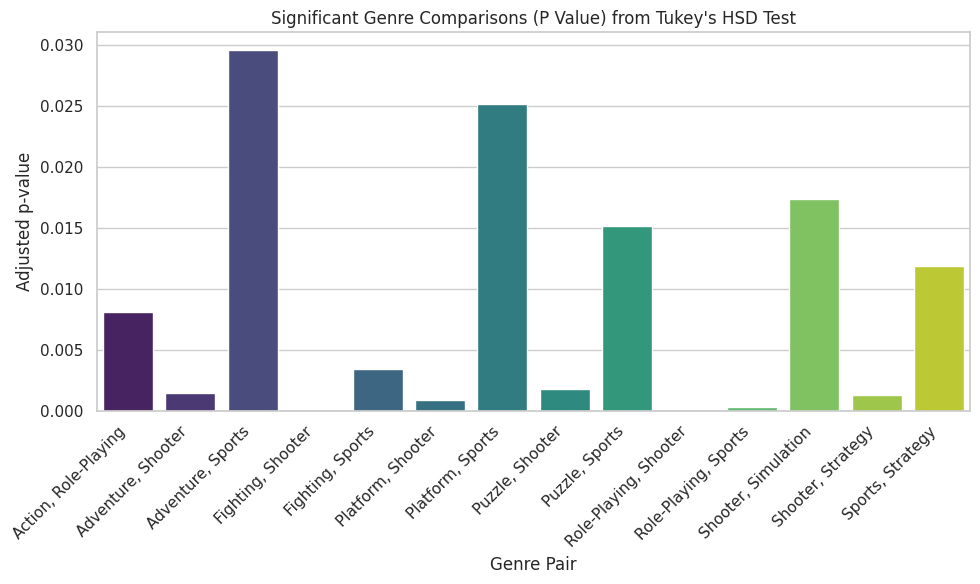

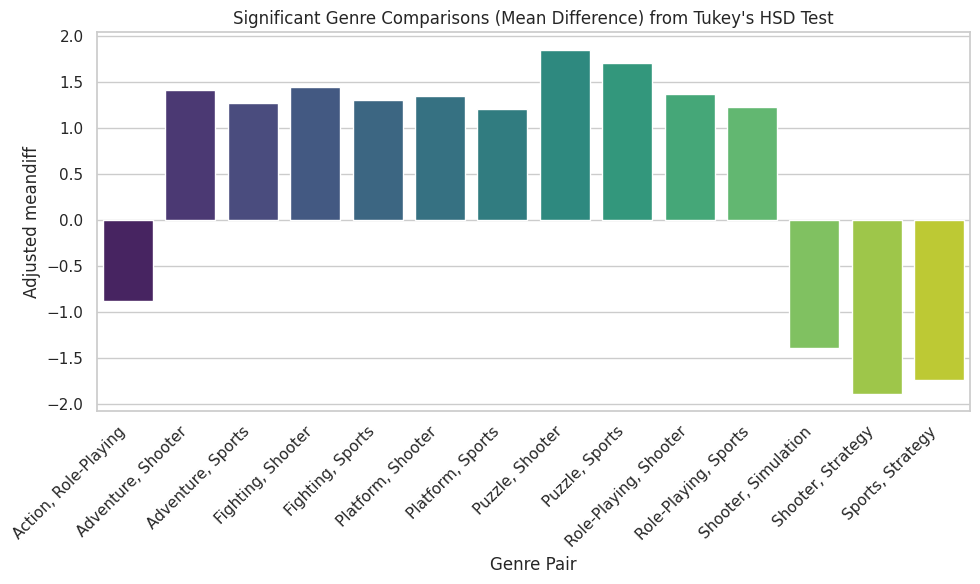

In [1312]:
# Step 1: Group the data by 'genre' and extract 'total_sales' for each genre group
grouped_data = [vgdf[vgdf['genre'] == genre]['total_sales'] for genre in vgdf['genre'].unique()]

# Step 2: Perform One-Way ANOVA
f_stat, p_val = stats.f_oneway(*grouped_data)

# Step 3: Display the results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.20f}")

# Step 4: Perform Tukey's HSD test if the ANOVA p-value is significant (typically < 0.05)
if p_val < 0.05:
  print("\nPerforming Tukey's HSD Test:")

  # Flatten the data to a form suitable for Tukey's HSD test
  tukey_data = pd.DataFrame({
      'total_sales': vgdf['total_sales'],
      'genre': vgdf['genre']
  })

  # Perform Tukey's HSD test
  tukey_results = pairwise_tukeyhsd(endog=tukey_data['total_sales'], groups=tukey_data['genre'], alpha=0.05)

  # Step 5: Filter significant comparisons (p-value < 0.05)
  significant_comparisons = tukey_results.summary().data[1:]  # Exclude the header
  significant_comparisons_df = pd.DataFrame(significant_comparisons, columns=tukey_results.summary().data[0])

  # Filter for p-values less than 0.05
  significant_comparisons_df = significant_comparisons_df[significant_comparisons_df['p-adj'] < 0.05]
  significant_comparisons_df['pairwise'] = significant_comparisons_df['group1'] + ', ' + significant_comparisons_df['group2']

  print("\nSignificant Genre Comparisons:")
  print(significant_comparisons_df)

  plt.figure(figsize=(10, 6))
  sns.barplot(x='pairwise', y='p-adj', data=significant_comparisons_df, palette='viridis')

  # Adding labels and title
  plt.title('Significant Genre Comparisons (P Value) from Tukey\'s HSD Test')
  plt.xlabel('Genre Pair')
  plt.ylabel('Adjusted p-value')

  # Rotate x labels for better visibility
  plt.xticks(rotation=45, ha='right')

  # Show the plot
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.barplot(x='pairwise', y='meandiff', data=significant_comparisons_df, palette='viridis')

  # Adding labels and title
  plt.title('Significant Genre Comparisons (Mean Difference) from Tukey\'s HSD Test')
  plt.xlabel('Genre Pair')
  plt.ylabel('Adjusted meandiff')

  # Rotate x labels for better visibility
  plt.xticks(rotation=45, ha='right')

  # Show the plot
  plt.tight_layout()
  plt.show()

else:
  print("\nNo significant difference found in ANOVA. Tukey's HSD test is not necessary.")

Based on the p-value of the results, we reject the null hypothesis. There is a huge difference with which genre a game is based on. Using Tukey's HSD Test, we can see which genre has more sales than the other with statistically significant difference [10]. For example, when choosing a game that is either an Adventure or Sports genre, it is significant to choose Adventure first as the mean difference is positive (Adventure is group one, Sports is group two).

The graph is sorted alphabetically by group one's names for the sake of clarity since there are many combinations of genres

## 5.2 Release Date

From the inferences made beforehand, there were certain connections found between the release date of video games and their total revenue generated. In the same way three aspects of the release dates (month, year, month-year) were observed, there shall also be tests to deduce what specific aspect of release dates play a large role in influencing the success of a video game.

### Hypotheses for Release Month

H<sub>0</sub>: Release month has no significant effect on total sales.

H<sub>A</sub>: At least one of the months have a significant effect on total sales.

Given that aggregating total sales by month creates categorical data (with each month representing a separate category), it is reasonable to check for associations using linear regression, but with the month as a categorical variable (treated as factors). This allows us to test if the month of release has a significant effect on total sales, while also accounting for the natural ordering of months.

In [1313]:
df = pd.DataFrame({
    'Month': all_sales_per_month.index,
    'TotalSales': all_sales_per_month.values
})

df['TotalSales'] = pd.to_numeric(df['TotalSales'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

X = df['Month']
y = df['TotalSales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSales   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.572
Date:                Sat, 05 Apr 2025   Prob (F-statistic):              0.140
Time:                        15:39:47   Log-Likelihood:                -55.570
No. Observations:                  12   AIC:                             115.1
Df Residuals:                      10   BIC:                             116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4949     16.737      0.448      0.6

Based on the regression results, the p-value for the month coefficient (0.664) is greater than 0.05, meaning we fail to reject the null hypothesis (H<sub>0</sub>). Thus, there is no significant evidence from this analysis to suggest that the release month affects total sales.

### Hypotheses for Release Year

AR (Autoregressive) component:

H₀: The lag values (previous time points) do not significantly influence the current value.

Hₐ: The lag values (previous time points) significantly influence the current value.


---


MA (Moving Average) component:


H₀: The past forecast errors do not significantly influence the current value.

Hₐ: The past forecast errors significantly influence the current value.



---


Stationarity (ADF Test):


H₀: The time series is non-stationary (the mean and variance are not constant over time).

Hₐ: The time series is stationary (the mean and variance are constant over time).

Observing the connection between a game's year of release and total sales is now a continuous time series analysis, which would require applying time series models like ARIMA. To find the most optimal `(p, d, q) x (P, D, Q, S)` order for ARIMA and SARIMA, the order that yields the lowest AIC value should be chosen. The Akaike Information Criterion (AIC) is a computed number that determines how fit an order is for a certain ARIMA model [11]. The lower this value is the better the order fits the model.

Below is the helper function sourced from Data Science Deep Dive [12] designed to get the most optimal `(p, d, q) x (P, D, Q, S)` orders for ARIMA and SARIMA by finding the lowest AIC value from iterating over a set number of orders.

In [1314]:
def AIC_PDQS(df, sarima=True):
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

    # Auto-Regressive (p) -> Number of autoregressive terms.
    # Integrated (d) -> Number of nonseasonal differences needed for stationarity.
    # Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    # Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
        if sarima:
            for combs in pdqs:
                try:
                    mod = SARIMAX(df,order=comb,seasonal_order=combs,
                    enforce_stationarity=False,enforce_invertibility=False)

                    output = mod.fit()
                    ans.append([comb, combs, output.aic])
                except:
                    continue
        else:
            try:
                mod = ARIMA(df,
                            order=comb,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, None, output.aic])  # ARIMAX does not need seasonal_order
            except:
                continue

    # Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    print(ans_df.loc[ans_df['aic'].idxmin()])

In [1315]:
print("Best order for ARIMA: ")
AIC_PDQS(all_sales_per_year, sarima=False)

Best order for ARIMA: 
pdq      (0, 1, 1)
pdqs          None
aic     187.910103
Name: 3, dtype: object


In [1316]:
model = ARIMA(all_sales_per_year, order=(0, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

print(model_fit.summary())

years_adfuller = adfuller(all_sales_per_year)
print(f"P-value for grouping by years: {years_adfuller[1]:.2f}")

                               SARIMAX Results                                
Dep. Variable:        log_total_sales   No. Observations:                   30
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -91.955
Date:                Sat, 05 Apr 2025   AIC                            187.910
Time:                        15:39:47   BIC                            190.502
Sample:                             0   HQIC                           188.681
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0175      0.405      0.043      0.965      -0.776       0.811
sigma2        53.1760      5.845      9.097      0.000      41.720      64.632
Ljung-Box (L1) (Q):                   0.00   Jarque-

Viewing the ARIMA results of the data aggregated by year shows that the most optimal `(p, d, q)` value is `(0, 1, 1)`. As there was no autoregression done in the model, the hypothesis for autoregression cannot be answered nor applied. Looking at the p-value of the moving average, it is calculated at `0.965`, larger than `0.05`. The ADF is also larger than `0.05`. Both null hypotheses will fail to be rejected, and it can be concluded that past forecast errors do not affect forecasting the total sales, and that the data is non-stationary which suggests there are trends or seasonality in the data.

### Hypotheses for Release Year-Month

AR (Autoregressive) component:


H₀: The lag values (previous time points) do not significantly influence the current value.

Hₐ: The lag values (previous time points) significantly influence the current value.



---



MA (Moving Average) component:


H₀: The past forecast errors do not significantly influence the current value.

Hₐ: The past forecast errors significantly influence the current value.


---


Stationarity (ADF Test):


H₀: The time series is non-stationary (the mean and variance are not constant over time).

Hₐ: The time series is stationary (the mean and variance are constant over time).


---


Seasonal MA (SMA) component:

H₀: The seasonal forecast errors do not significantly influence the current value of the time series.

Hₐ: The seasonal forecast errors significantly influence the current value of the time series.

The approach for observing year-month is the same as above, but since seasonality was observed in the graph for release year-month, it may be beneficial to check for it as well using SARIMAX.

In [1317]:
print("\nBest order and seasonal order for SARIMA: ")
AIC_PDQS(all_sales_per_month_year)


Best order and seasonal order for SARIMA: 
pdq         (1, 0, 1)
pdqs    (1, 1, 1, 12)
aic        982.344116
Name: 47, dtype: object


In [1318]:
model = SARIMAX(all_sales_per_month_year,
                order=(1, 0, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()
print(model_fit.summary())

my_adfuller = adfuller(all_sales_per_month_year)
print(f"P-value for grouping by years-months: {my_adfuller[1]:.2f}")

                                     SARIMAX Results                                      
Dep. Variable:                    log_total_sales   No. Observations:                  354
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -486.172
Date:                            Sat, 05 Apr 2025   AIC                            982.344
Time:                                    15:39:58   BIC                           1001.309
Sample:                                06-30-1989   HQIC                           989.911
                                     - 11-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9532      0.029     32.574      0.000       0.896       1.011
ma.L1         -0.8019      0.046   

Interestingly, all of the calculated p-values for the model are 0.00, which are well below 0.05. This leads to rejecting the null hypotheses for AR, MA, and SMA, and concludes that the lag values, forecast errors, and seasonality are highly significant in forecasting sales. Additionally, since the ADF p-value is higher than 0.05, the null hypothesis for stationarity will be rejected. This means that there is no stationarity in the data and backs the previous conclusion for seasonality's impact in forecasting sales.

However, it's important to note that while these temporal factors are significant, they are not the sole contributors to a game's success. The year and month of release can be influenced by various external factors and trends that are not captured in the dataset, such as market conditions, competition, marketing strategies, and even cultural or social events. These external influences could substantially affect the sales figures, and their absence from the model suggests that other key variables might be at play in determining a game's overall success.

## 5.4 Game Franchises

### Is there a significant difference between the sales of Standalone Games and Franchise Games?

### Hypotheses

H<sub>0</sub>: There is no significant difference between the sales of Standalone Games and Franchise games

H<sub>A</sub>: There is a significant difference between the sales of Standalone Games and Franchise games


In [1319]:
# Step 1: Extract the relevant sales data
franchise_games_anova = franchise_vgdf[franchise_vgdf['standalone'] == 0].groupby('title')['total_sales'].sum().reset_index()
standalone_games_anova = franchise_vgdf[franchise_vgdf['standalone'] == 1].groupby('franchise')['total_sales'].sum().reset_index()

# Step 2: Run Unpaired Observations t-test (equal_var=False is false as they have different variances)
t_stat, p_val = sp.ttest_ind(franchise_games_anova['total_sales'], standalone_games_anova['total_sales'], equal_var=False)

# Step 3: Display the Results
print(f"T-test results:")
print(f"T-statistic = {t_stat:.2f}")
print(f"P-value = {p_val:.16f}")

T-test results:
T-statistic = 8.02
P-value = 0.0000000000000042


Since the p-value is less than the significance level 0.05, we can reject the null hypothesis and conclude that there is a significant difference between the sales of Standalone Games and Franchise Games.

Furthermore, since the T-statistic value is positive, this implies that the sample mean for the Franchise Games is higher than the sample Mean for the Standalone Games.

# 6. Insights and Conlusions

Based on Statistical testing,
- Some genres are more likely to appear on specific consoles.
- There is no significant interaction between console and genre, meaning the effect of genre on the total sales does not significantly vary across different consoles and different genres.
- The genre a game is based on significantly influences the total sales
- Franchise Games generally have significantly higher sales than Standalone Games
- Release month and year together impact forecasting sales, but this is highly influenced by external factors not in the scope of the dataset.

Overall, this data analysis highlights some of the critical factors influencing video game sales, and offers insight into how developers, publishers, and marketers can optimize their strategies based on these statistical evidence. However, more exploration into external factors, such as time-based sales, are needed in order to improve forecasting models to see what is the current trend in the video game industry.

# 7. Bibliography

<ol>

<li>Henry E Lowood. 1998. Electronic game | Definition, History, Systems, & Facts. <em>Encyclopedia Britannica</em>. Retrieved February 10, 2025 from <a href="https://www.britannica.com/topic/electronic-game">https://www.britannica.com/topic/electronic-game</a></li>

<li>asaniczka. 2024. Video Game Sales 2024. <em>Kaggle.com</em>. Retrieved February 10, 2025 from <a href="https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024">https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024</a></li>

<li>Abdulshaheed Alqunber. 2019. Video Games Sales 2019. <em>Kaggle.com</em>. Retrieved February 10, 2025 from <a href="https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019">https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019</a> </li>

<li>Bayne Brannen. 2020. Video Game Sales 2020. <em>Kaggle.com</em>. Retrieved February 10, 2025 from <a href="https://www.kaggle.com/datasets/baynebrannen/video-game-sales-2020">https://www.kaggle.com/datasets/baynebrannen/video-game-sales-2020</a> </li>

<li>VGChartz Staff. 2010. Editorial: Why it is so Easy to Blame VGChartz. <em>VGChartz</em>. Retrieved from <a href="https://www.vgchartz.com/article/82746/editorial-why-it-is-so-easy-to-blame-vgchartz/">https://www.vgchartz.com/article/82746/editorial-why-it-is-so-easy-to-blame-vgchartz/</a></li>

<li>Abdulshaheed Alqunber. 2025. vgchartzScrape: a web scraping project for data capture of vgchartz. <em>GitHub</em>. Retrieved February 10, 2025 from <a href="https://github.com/ashaheedq/vgchartzScrape">https://github.com/ashaheedq/vgchartzScrape</a> </li>

<li>‌Video Game Charts. 2025. About VGChartz. <em>VGChartz</em>. Retrieved February 10, 2025 from <a href="https://www.vgchartz.com/about.php">https://www.vgchartz.com/about.php</a> </li>

<li>Taneli Panola. 2016. History of video games: Prelude to the fall (2009-2010). <em>VGChartz</em>.<em> </em>Retrieved from <a href="https://www.vgchartz.com/article/265118/history-of-video-games-prelude-to-the-fall-2009-2010/">https://www.vgchartz.com/article/265118/history-of-video-games-prelude-to-the-fall-2009-2010/</a>

<li>John Gorevan. 2024. The History of Video Game Box Art - Geeky Gorevan. <em>Geeky Gorevan</em>. Retrieved from <a href="https://geekygorevan.co.uk/the-history-of-video-game-box-art/" >https://geekygorevan.co.uk/the-history-of-video-game-box-art/</a>
‌</li>

<li>
Maurice Geraghty and De Anza College. 2021. Post‐hoc Analysis – Tukey’s Honestly Significant Difference (HSD) Test85. <em>Statistics LibreTexts</em>. Retrieved April 5, 2025 from  <a href="https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Inferential_Statistics_and_Probability_-_A_Holistic_Approach_(Geraghty)/13%3A_One_Factor_Analysis_of_Variance_(ANOVA)/13.06%3A_Posthoc_Analysis__Tukeys_Honestly_Significant_Difference_(HSD)_Test85">https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Inferential_Statistics_and_Probability_-_A_Holistic_Approach_(Geraghty)/13%3A_One_Factor_Analysis_of_Variance_(ANOVA)/13.06%3A_Posthoc_Analysis__Tukeys_Honestly_Significant_Difference_(HSD)_Test85
</a>
‌‌‌</li>

<li>
IBM. 2024. ARIMA models. <em>IBM</em>. Retrieved April 5, 2025 from <a href="https://www.ibm.com/think/topics/arima-model">ttps://www.ibm.com/think/topics/arima-model</a>
‌‌‌</li>

<li>DataScience Deep Dive. 2020. Time Series ARIMA model-Finding best fit AIC -pdq/s by grid search. <em>Medium</em>. Retrieved April 5, 2025 from <a href="https://datasciencedeepdive.medium.com/time-series-arima-model-finding-best-fit-aic-pdq-s-by-grid-search-f53636bddb68">
https://datasciencedeepdive.medium.com/time-series-arima-model-finding-best-fit-aic-pdq-s-by-grid-search-f53636bddb68
</a>
‌‌</li>



</ol>